In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Data Preprocessing_companies.csv")

In [3]:
# View first few rows
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
        id  unnamed:_0.1 entity_type  entity_id  parent_id  \
0      c:1             0     Company          1        NaN   
1     c:10             1     Company         10        NaN   
2    c:100             2     Company        100        NaN   
3  c:10000             3     Company      10000        NaN   
4  c:10001             4     Company      10001        NaN   

                 name     normalized_name  category_code     status  \
0            Wetpaint            wetpaint           42.0  operating   
1             Flektor             flektor           12.0   acquired   
2               There               there           12.0   acquired   
3             MYWEBBO             mywebbo           26.0  operating   
4  THE Movie Streamer  the movie streamer           12.0  operating   

   founded_at  ... first_milestone_at last_milestone_at milestones  \
0  2005-10-17  ...         2010-09-05        2013-09-18        5.0   
1         NaN  ...             

In [4]:
# Dataset Info
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7610 entries, 0 to 7609
Data columns (total 39 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   7610 non-null   object 
 1   unnamed:_0.1         7610 non-null   int64  
 2   entity_type          7610 non-null   object 
 3   entity_id            7610 non-null   int64  
 4   parent_id            0 non-null      float64
 5   name                 7609 non-null   object 
 6   normalized_name      7610 non-null   object 
 7   category_code        7609 non-null   float64
 8   status               7609 non-null   object 
 9   founded_at           4846 non-null   object 
 10  closed_at            224 non-null    object 
 11  domain               6122 non-null   object 
 12  homepage_url         6122 non-null   object 
 13  twitter_username     3668 non-null   object 
 14  short_description    7609 non-null   object 
 15  description          76

In [5]:
# Missing Values
print("\nMissing Values per Column:")
missing_values = df.isnull().sum()
print(missing_values)


Missing Values per Column:
id                        0
unnamed:_0.1              0
entity_type               0
entity_id                 0
parent_id              7610
name                      1
normalized_name           0
category_code             1
status                    1
founded_at             2764
closed_at              7386
domain                 1488
homepage_url           1488
twitter_username       3942
short_description         1
description               1
tag_list               3065
country_code              1
state_code                1
city                      1
region                    1
first_investment_at    7476
last_investment_at     7476
investment_rounds      7474
invested_companies     7474
first_funding_at       6091
last_funding_at        6091
funding_rounds         6068
funding_total_usd      6308
first_milestone_at     4188
last_milestone_at      4188
milestones             4188
relationships          2513
lat                    3109
lng                 

In [6]:
# Fill missing values
for col in df.select_dtypes(include=[np.number]).columns:
    df[col].fillna(df[col].mean(), inplace=True)
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

/tmp/ipython-input-2405614703.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
/tmp/ipython-input-2405614703.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

In [7]:
# Summary Statistics
print("\nSummary Statistics for Numerical Features:")
print(df.describe())


Summary Statistics for Numerical Features:
       unnamed:_0.1      entity_id  parent_id  category_code  country_code  \
count   7610.000000    7610.000000        0.0    7610.000000   7610.000000   
mean    3804.500000   71802.147700        NaN      24.627678    140.056118   
std     2196.962107   58867.909384        NaN      13.140377     47.260881   
min        0.000000       1.000000        NaN       0.000000      5.000000   
25%     1902.250000   12083.750000        NaN      12.000000    164.000000   
50%     3804.500000  102479.500000        NaN      24.000000    164.000000   
75%     5706.750000  136370.500000        NaN      38.000000    166.000000   
max     7609.000000  141573.000000        NaN      42.000000    173.000000   

        state_code          city       region  investment_rounds  \
count  7610.000000   7610.000000  7610.000000        7610.000000   
mean     35.851623   6966.693784  4129.679984           2.147059   
std      15.453326   3004.995543  1845.474440    

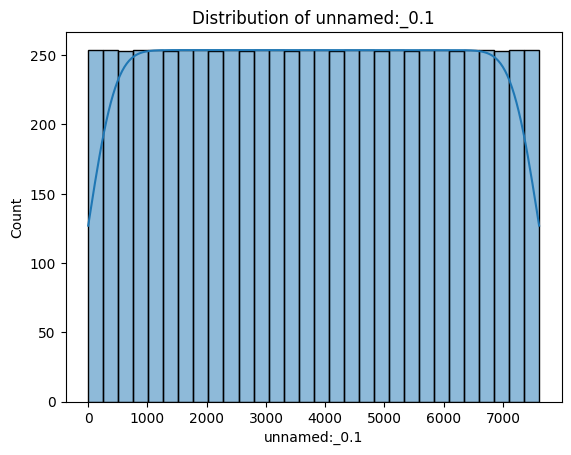

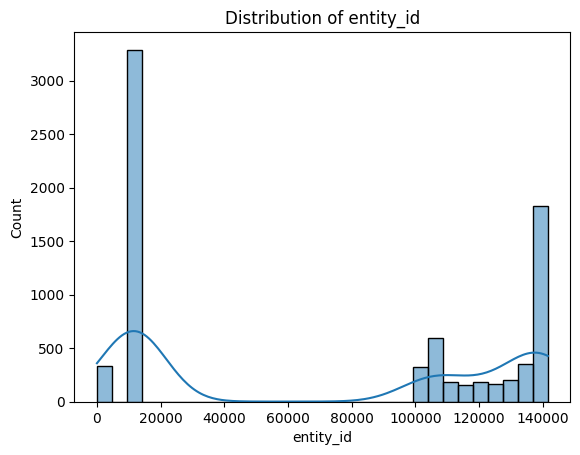

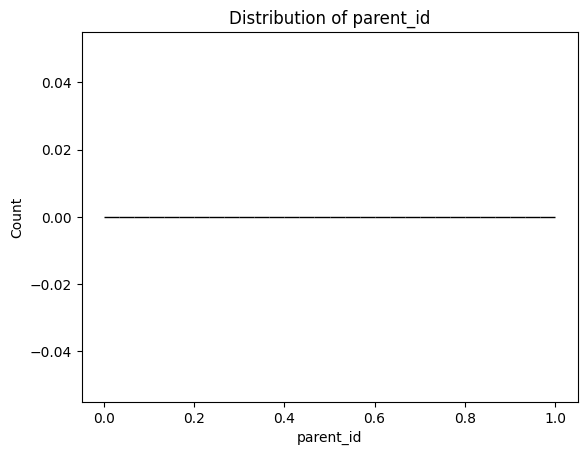

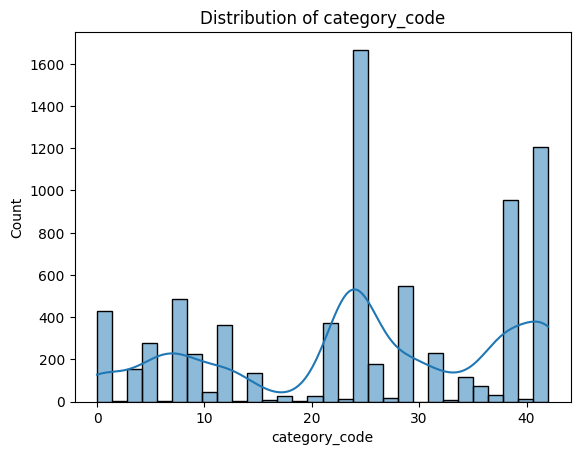

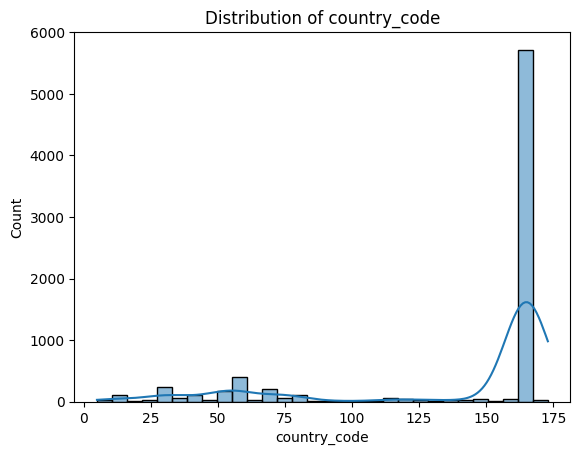

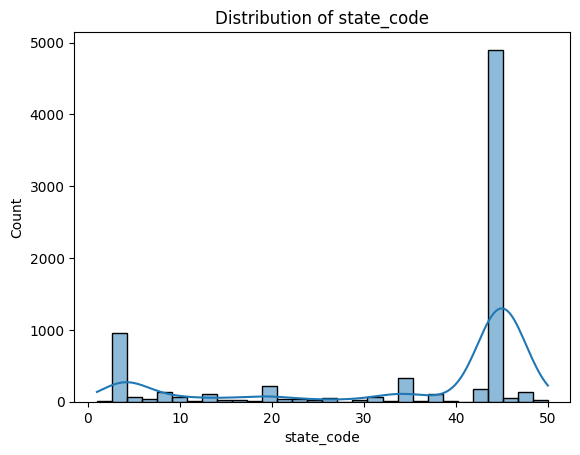

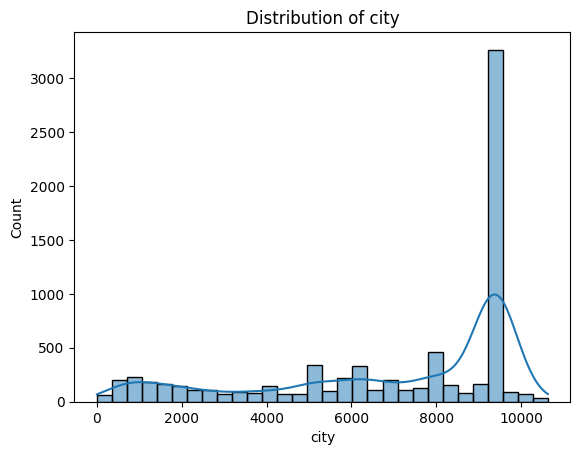

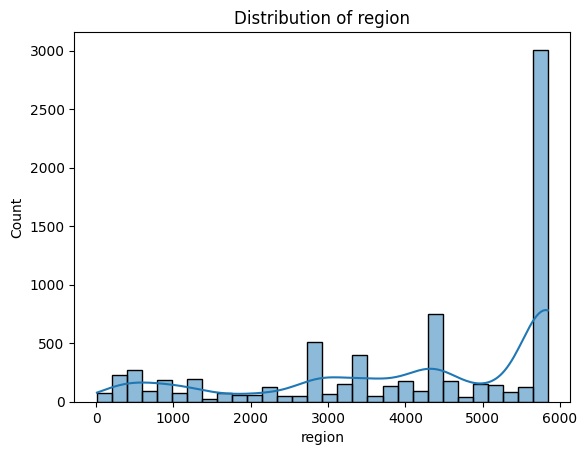

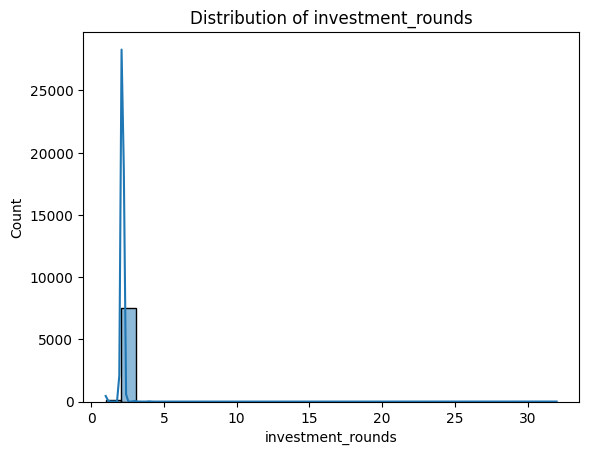

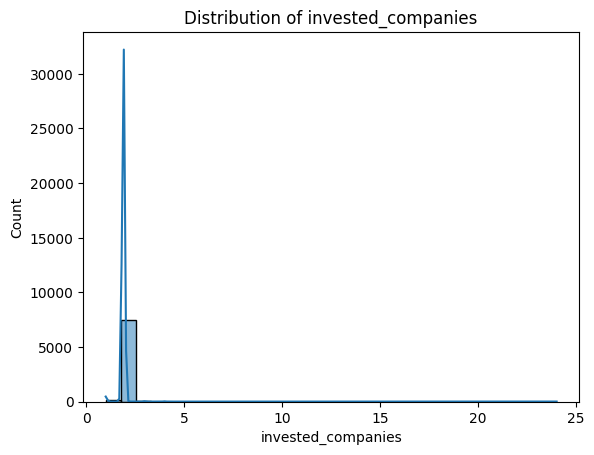

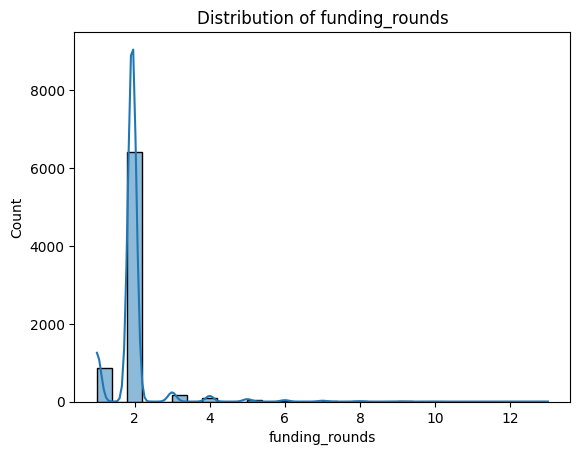

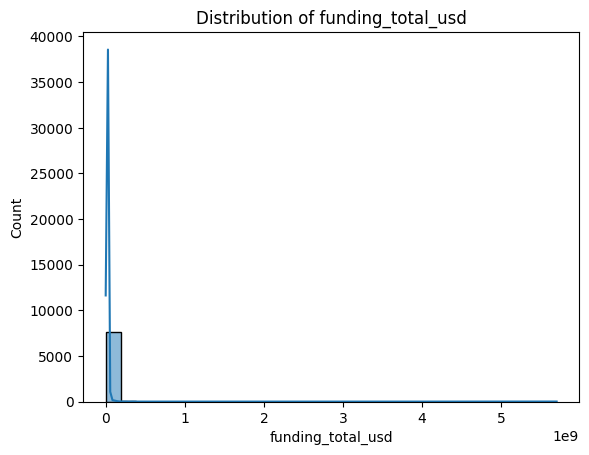

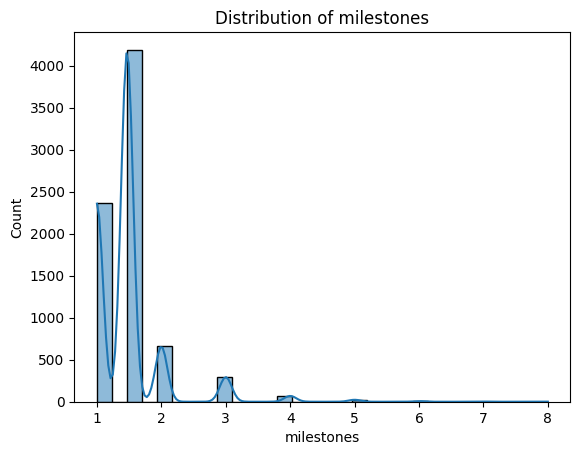

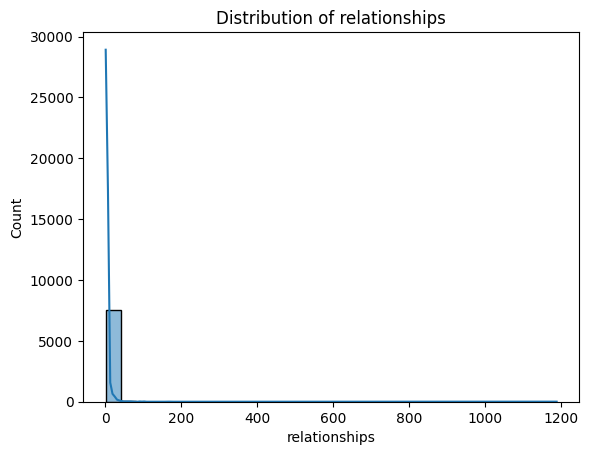

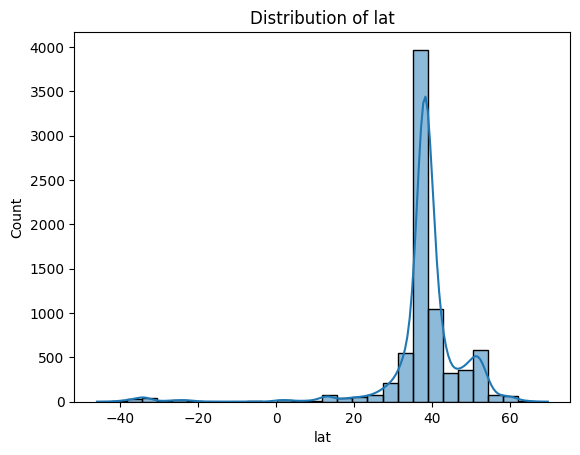

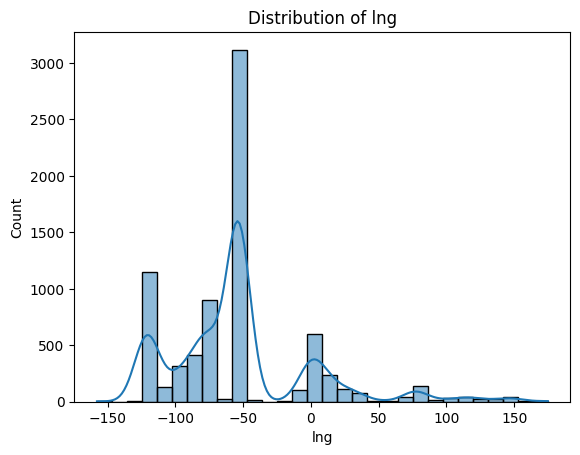

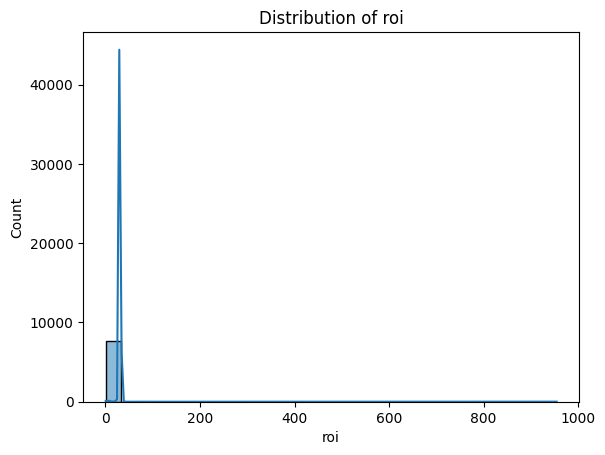

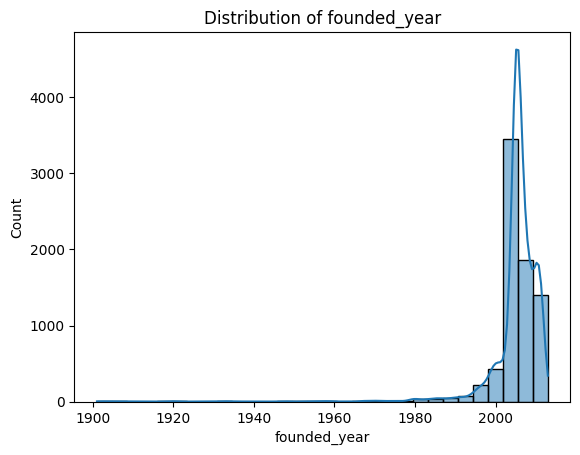

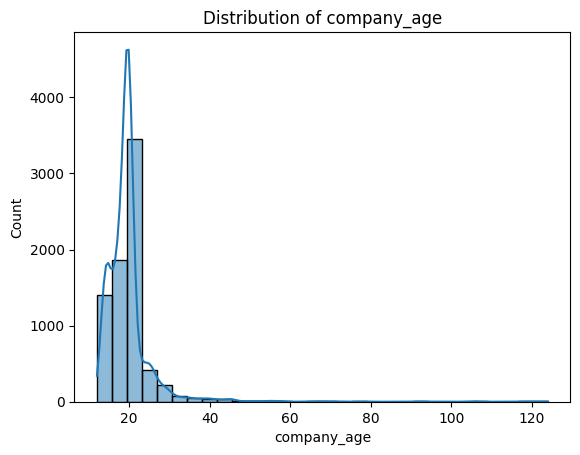

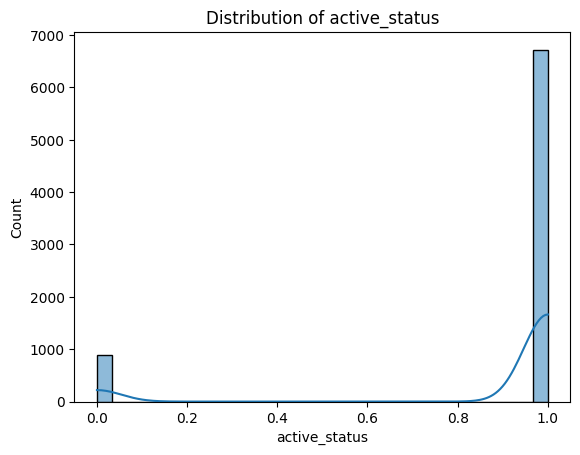

In [8]:
# Numerical Features Distribution
numeric_cols = df.select_dtypes(include=[np.number]).columns

for col in numeric_cols:
    plt.figure()
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()


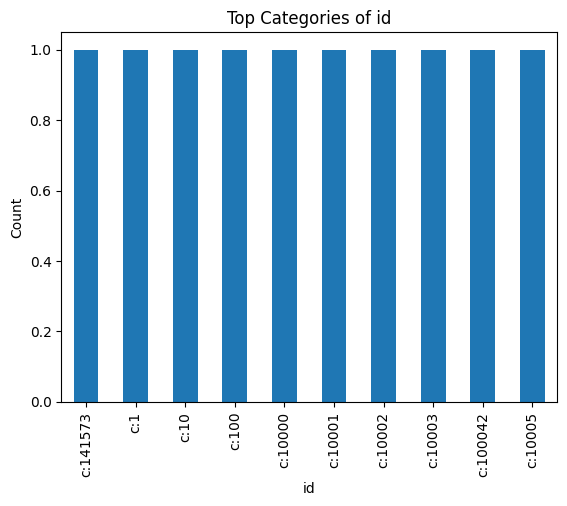

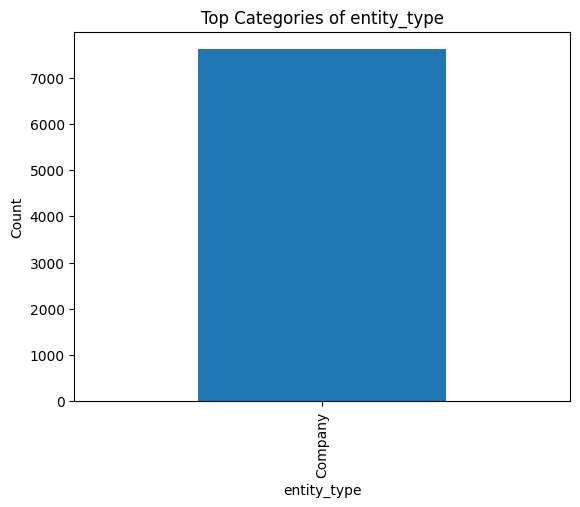

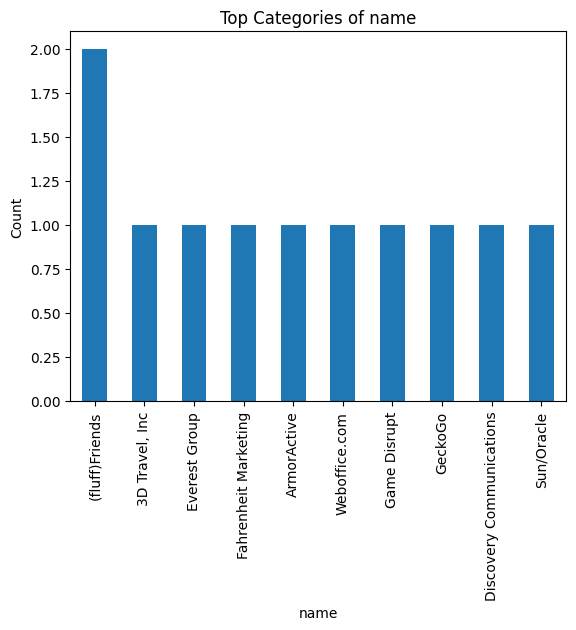

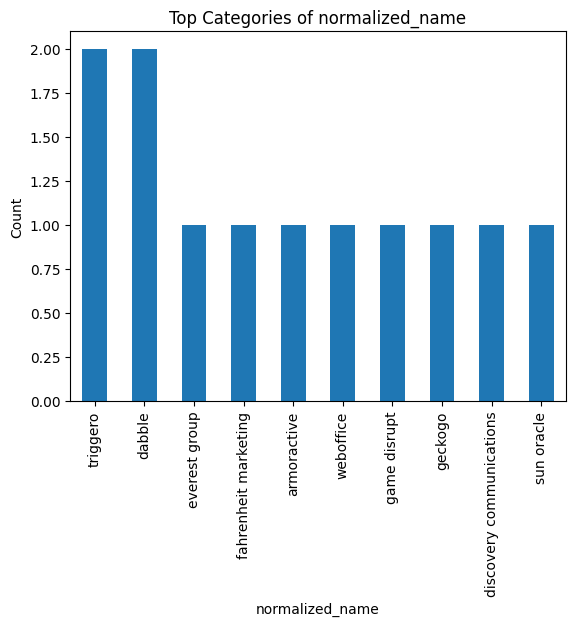

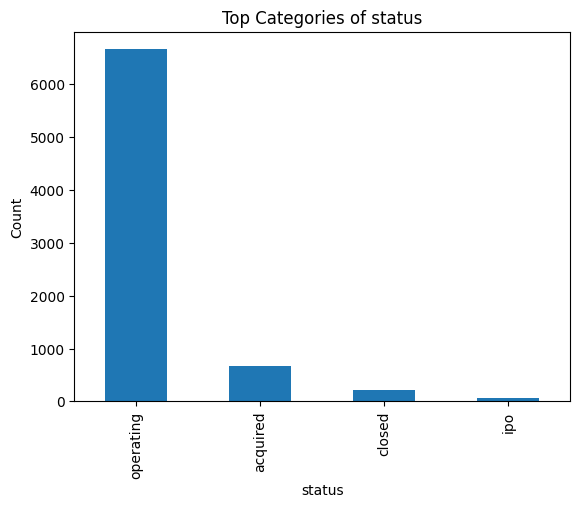

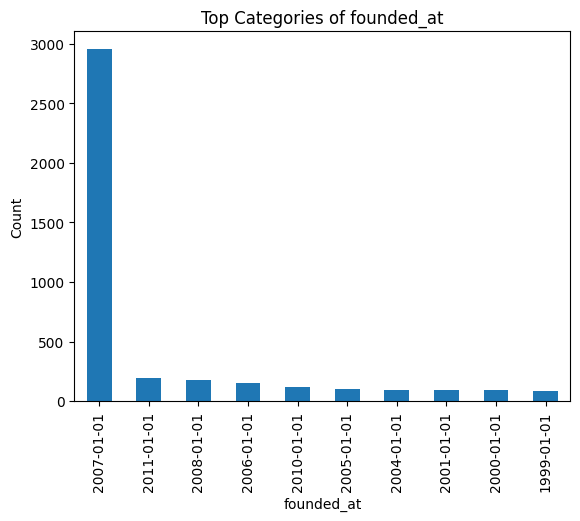

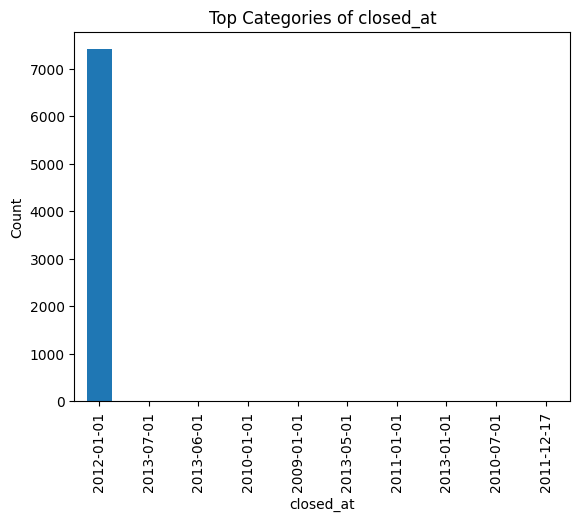

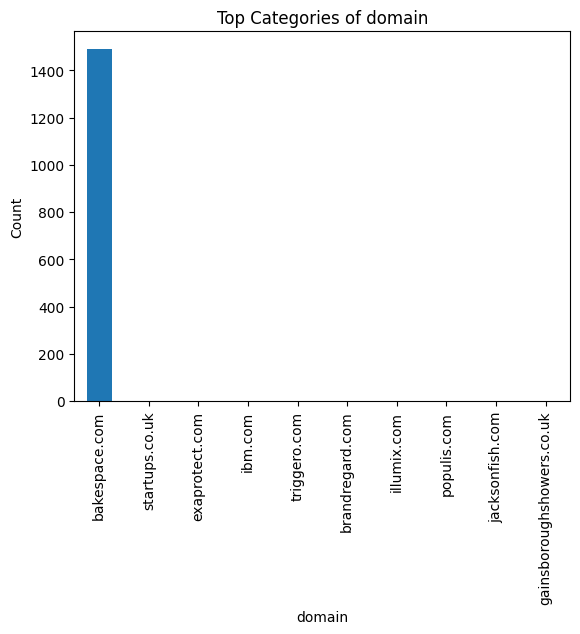

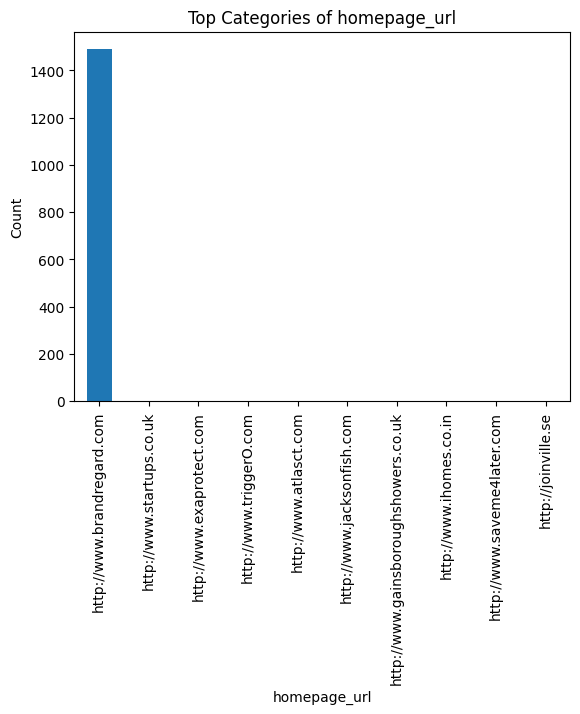

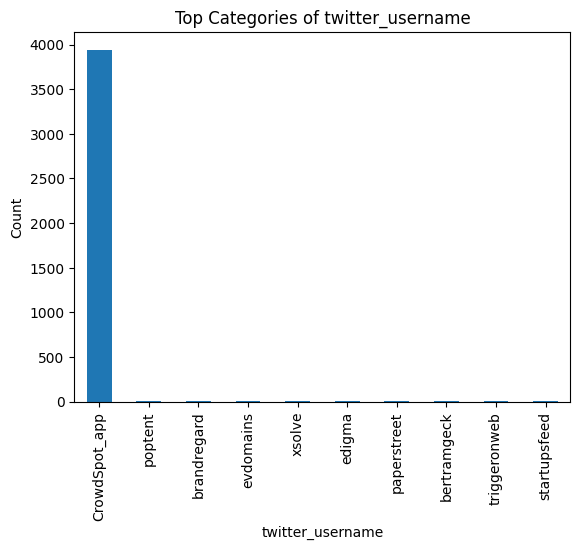

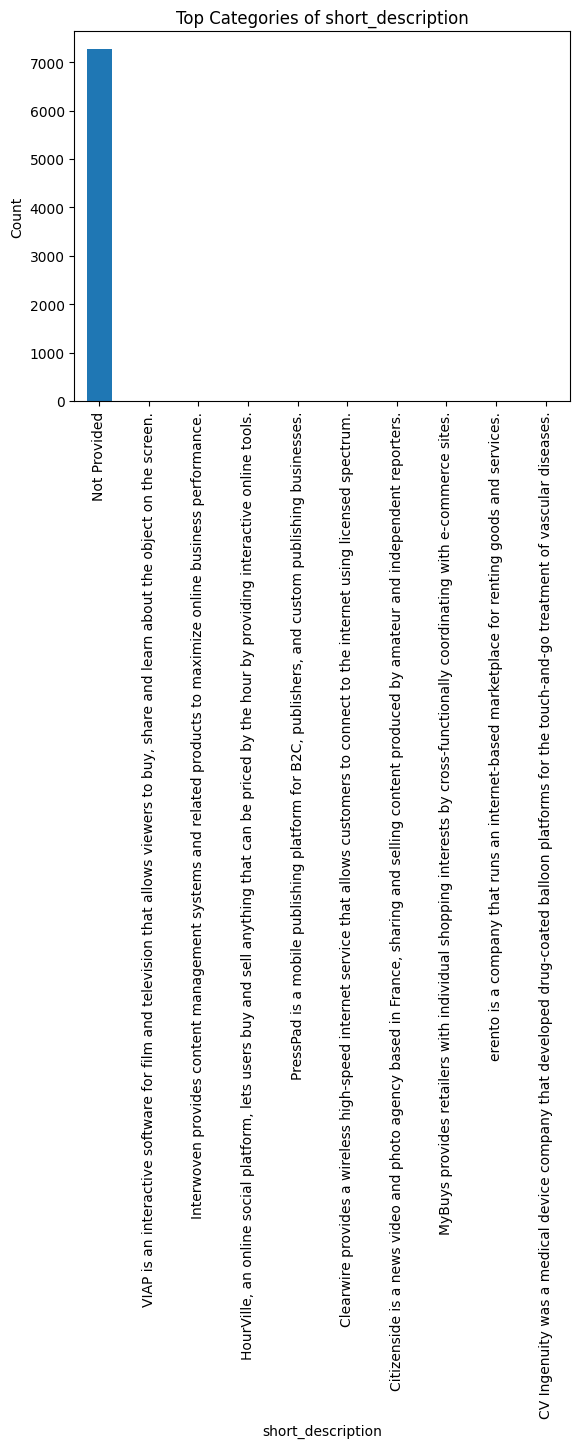

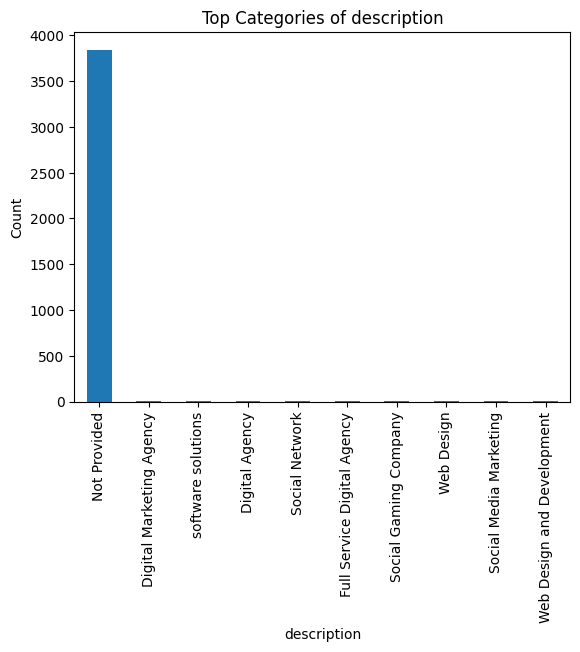

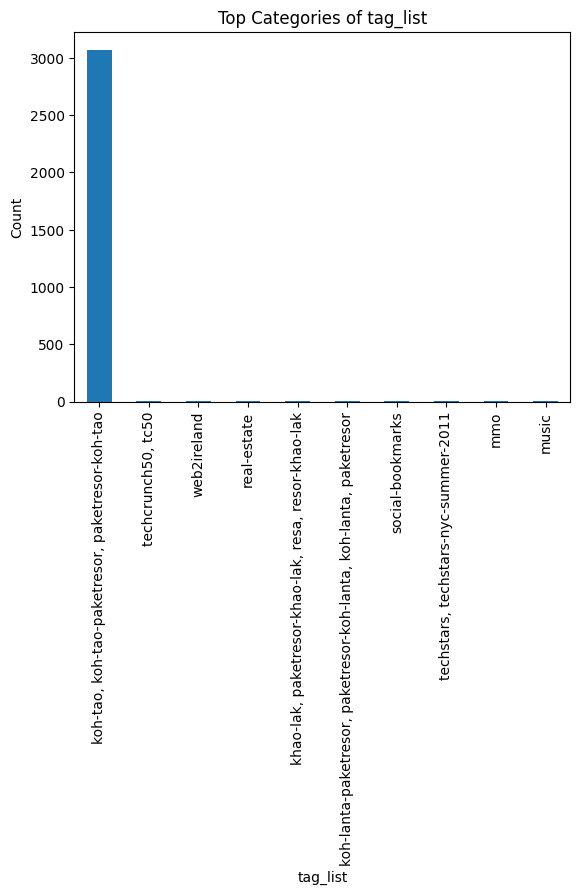

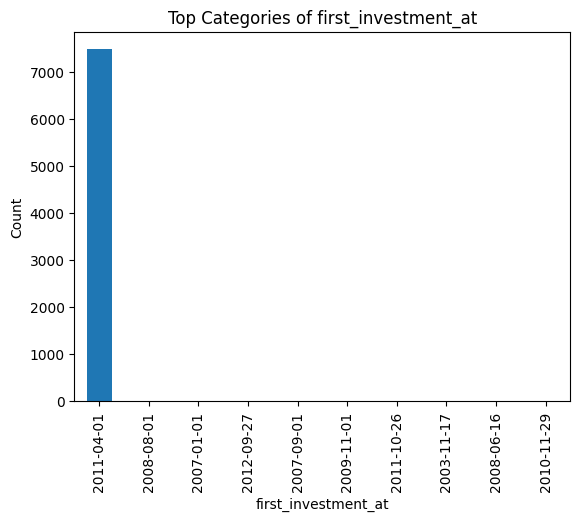

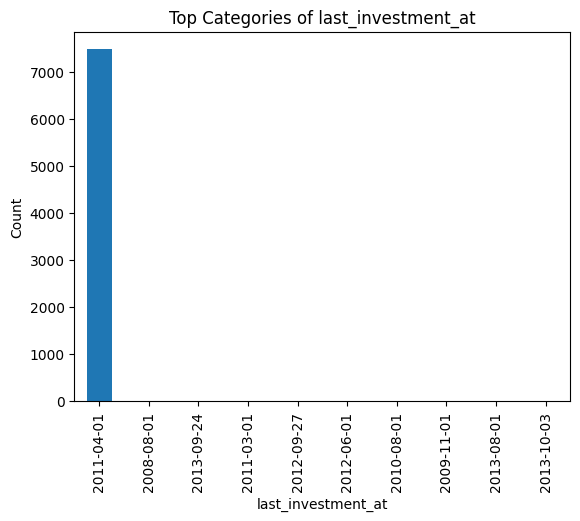

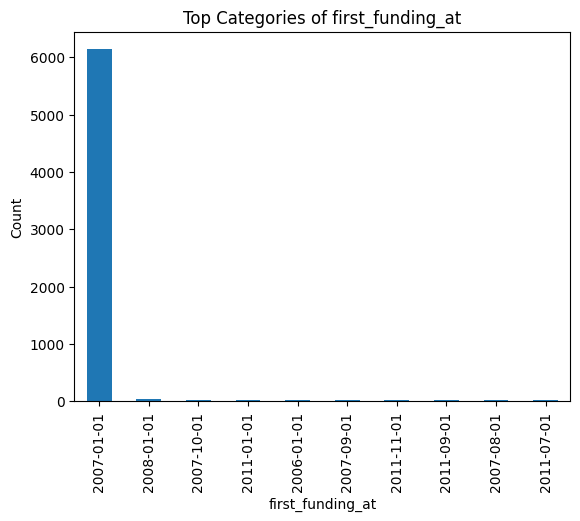

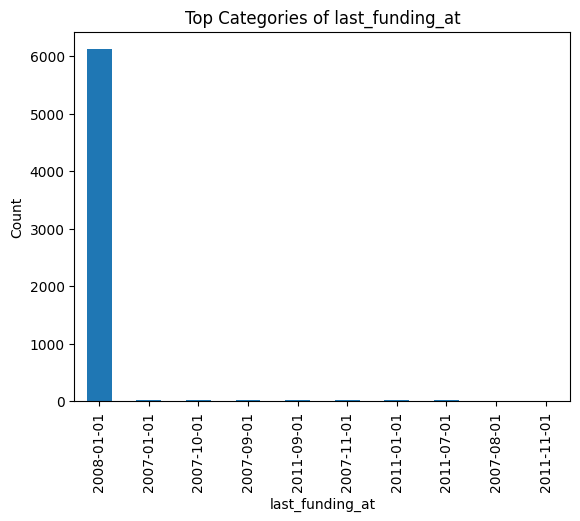

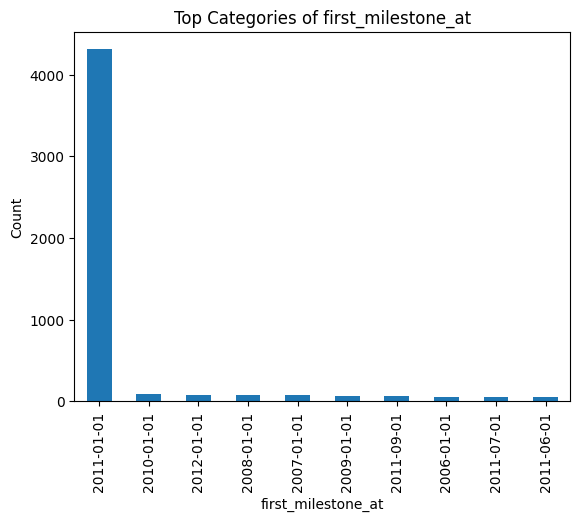

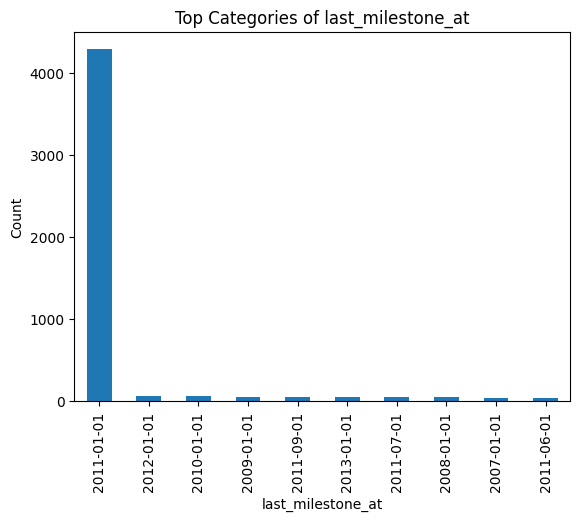

In [9]:
# Categorical Features Distribution
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    plt.figure()
    df[col].value_counts().head(10).plot(kind='bar')  # Top 10 categories
    plt.title(f"Top Categories of {col}")
    plt.ylabel("Count")
    plt.show()

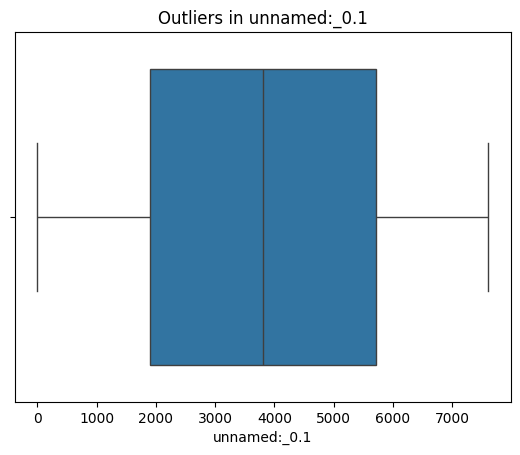

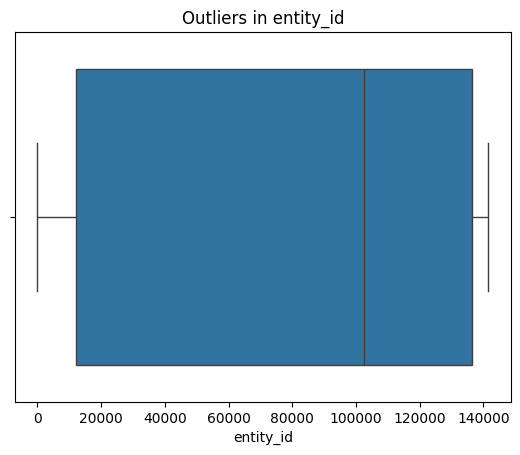

Skipping parent_id - no valid numeric data.


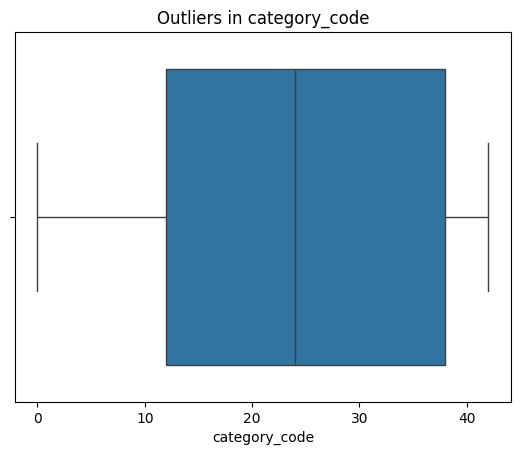

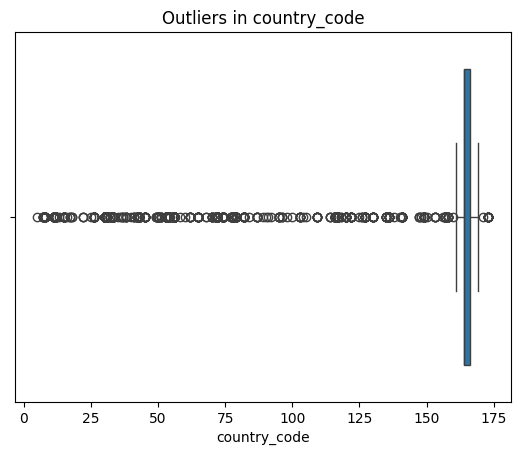

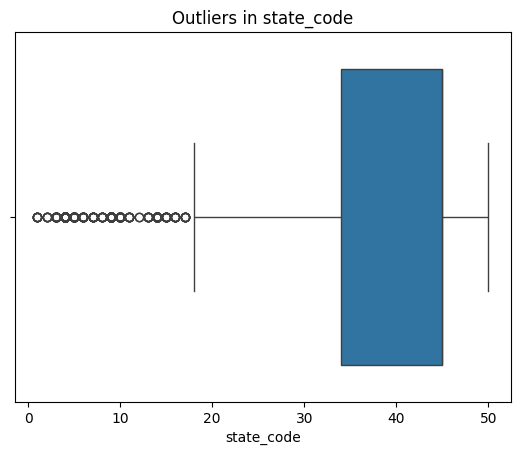

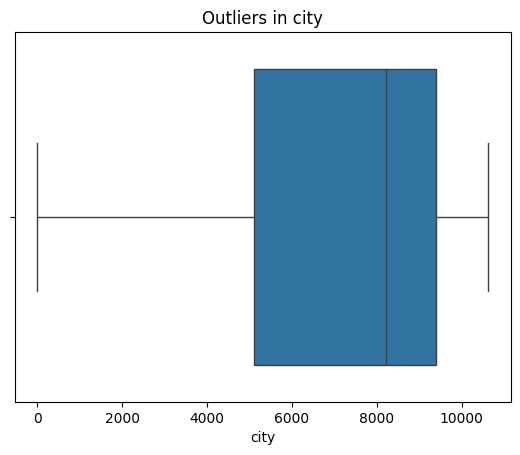

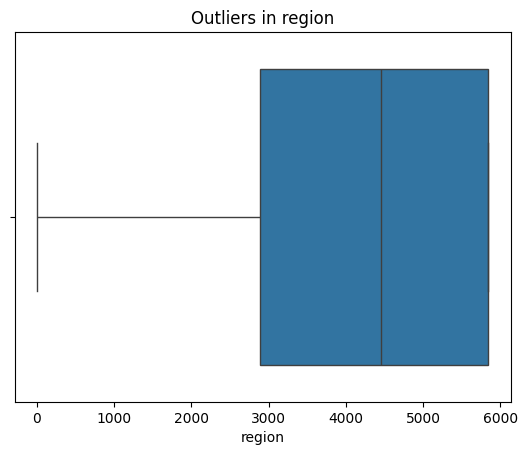

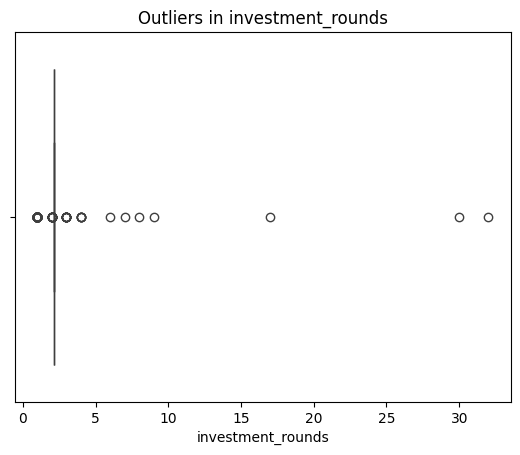

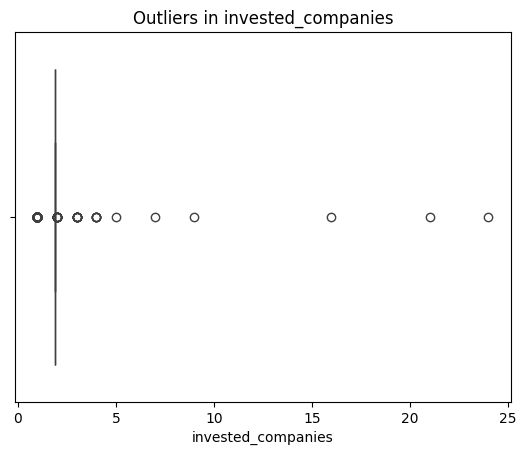

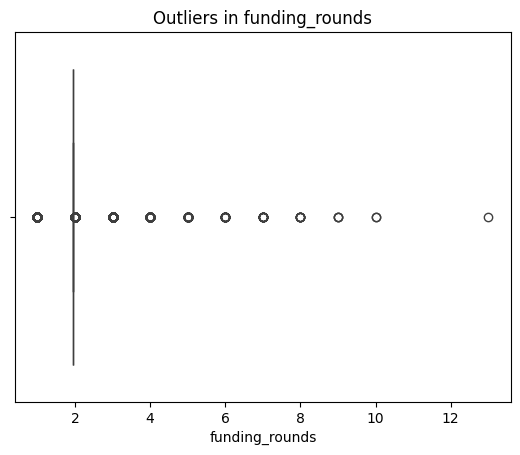

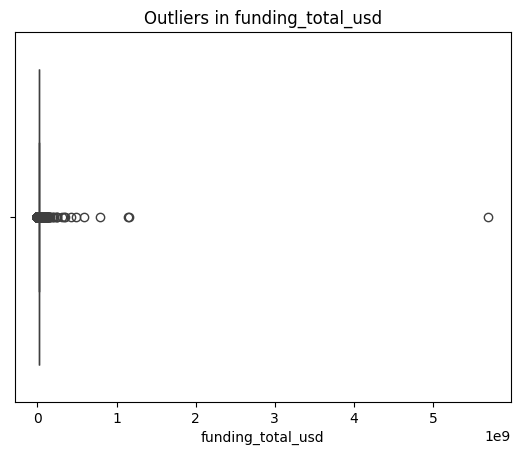

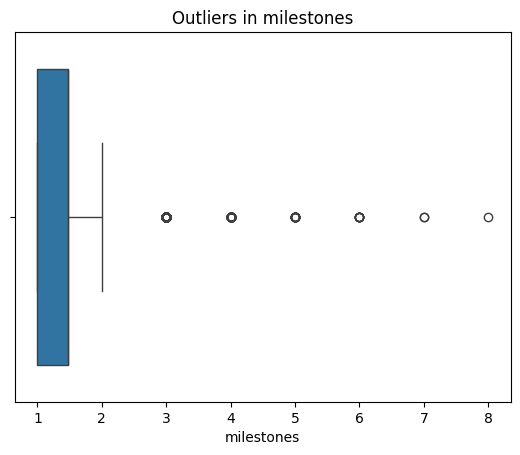

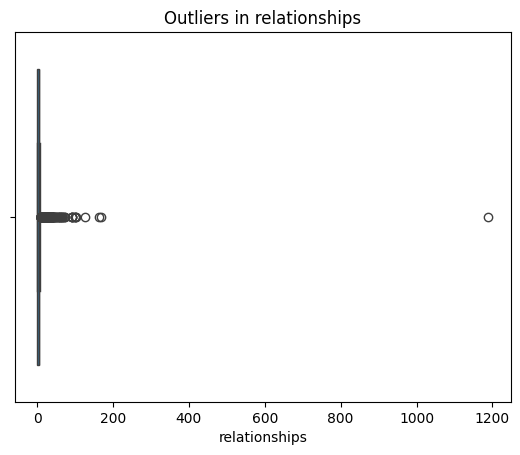

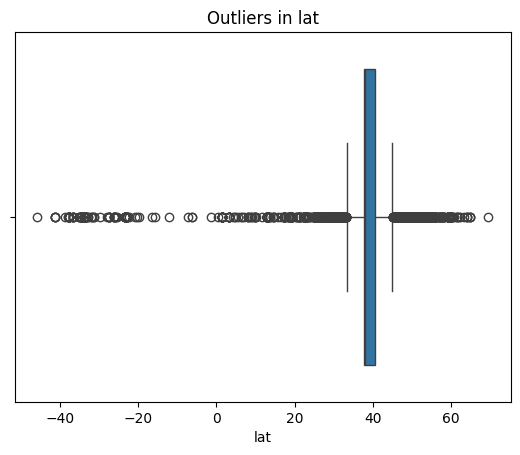

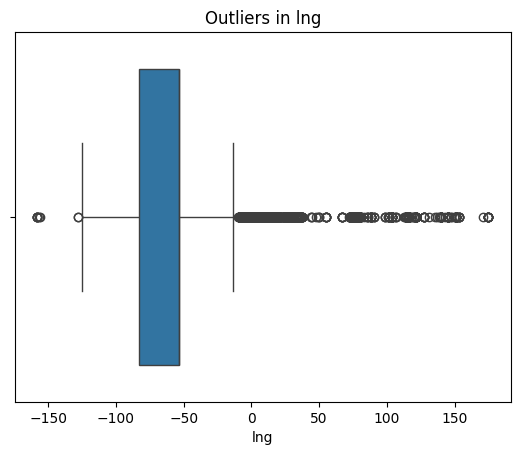

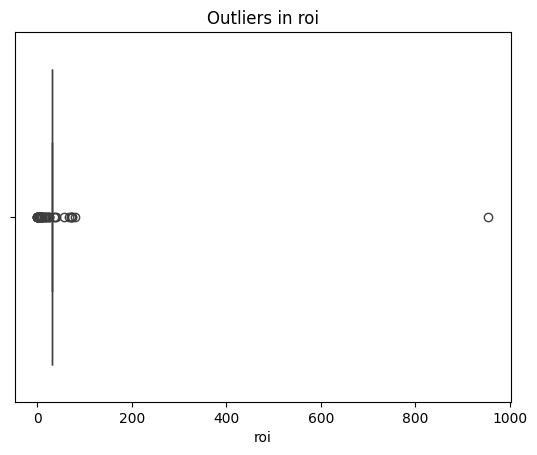

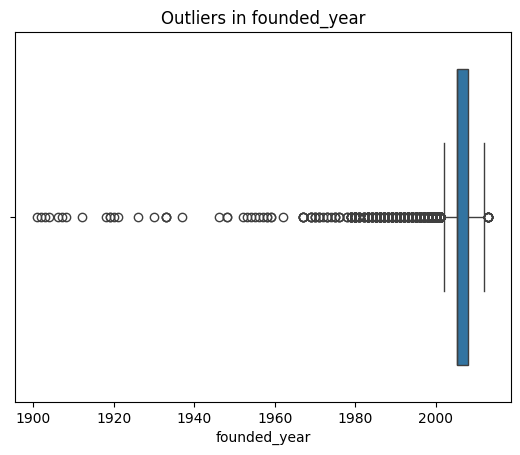

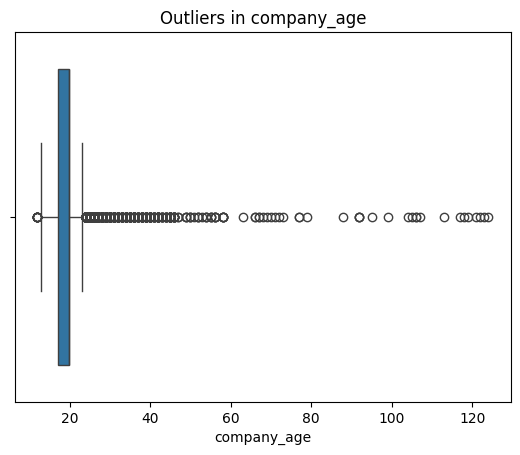

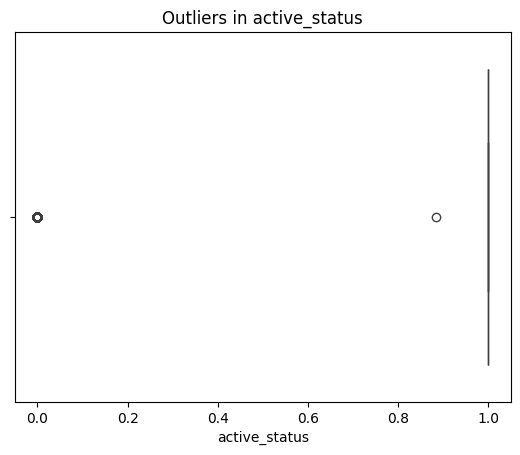

In [10]:
# Outlier Detection (Boxplots)
import matplotlib.pyplot as plt
import seaborn as sns

for col in numeric_cols:
    # Keep only numeric values and drop NaNs
    data = pd.to_numeric(df[col], errors='coerce').dropna()

    if data.empty:
        print(f"Skipping {col} - no valid numeric data.")
        continue

    plt.figure()
    sns.boxplot(x=data)
    plt.title(f"Outliers in {col}")
    plt.show()



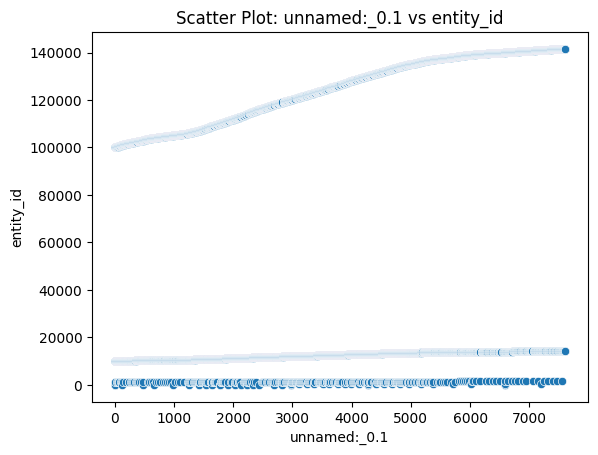

In [11]:
# Scatter Plots for Outlier Detection
if len(numeric_cols) >= 2:
    plt.figure()
    sns.scatterplot(x=df[numeric_cols[0]], y=df[numeric_cols[1]])
    plt.title(f"Scatter Plot: {numeric_cols[0]} vs {numeric_cols[1]}")
    plt.show()

# Univariate Data Analysis


Summary Statistics for unnamed:_0.1:
count    7610.000000
mean     3804.500000
std      2196.962107
min         0.000000
25%      1902.250000
50%      3804.500000
75%      5706.750000
max      7609.000000
Name: unnamed:_0.1, dtype: float64


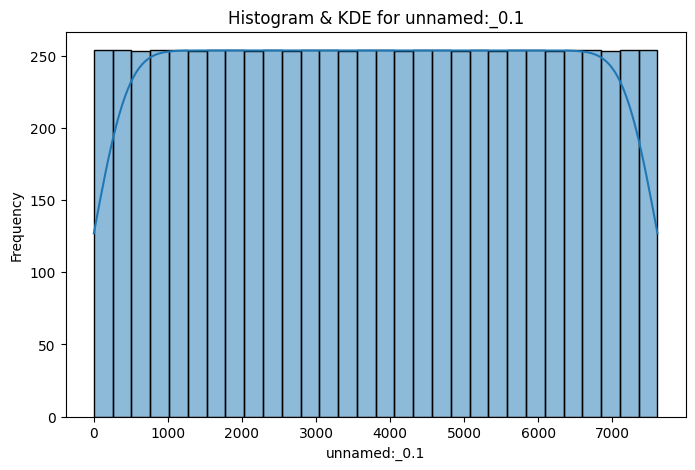


Summary Statistics for entity_id:
count      7610.000000
mean      71802.147700
std       58867.909384
min           1.000000
25%       12083.750000
50%      102479.500000
75%      136370.500000
max      141573.000000
Name: entity_id, dtype: float64


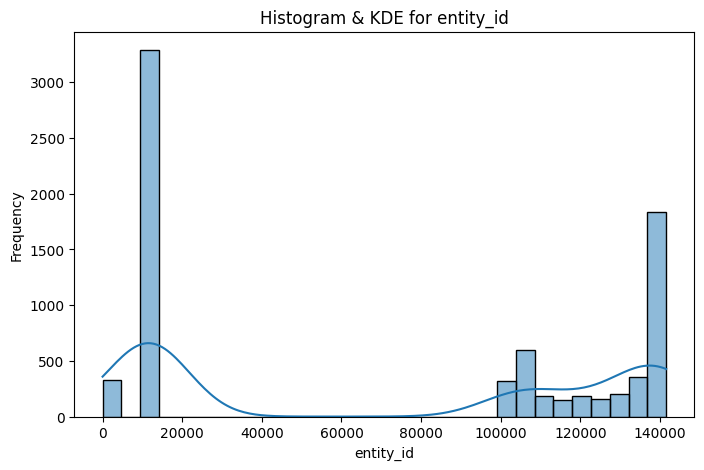


Summary Statistics for parent_id:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: parent_id, dtype: float64


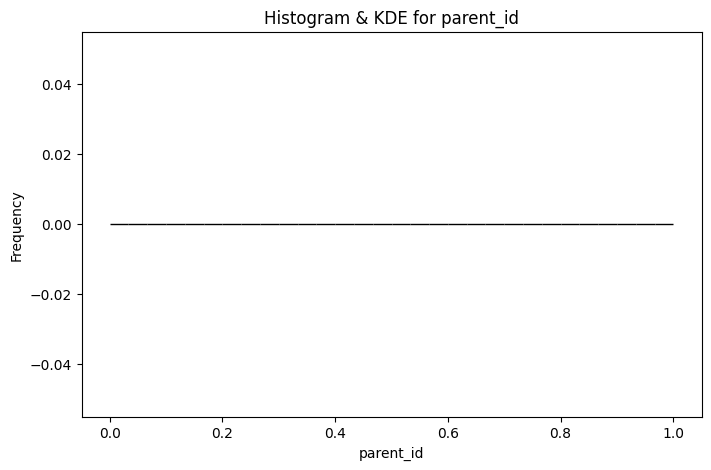


Summary Statistics for category_code:
count    7610.000000
mean       24.627678
std        13.140377
min         0.000000
25%        12.000000
50%        24.000000
75%        38.000000
max        42.000000
Name: category_code, dtype: float64


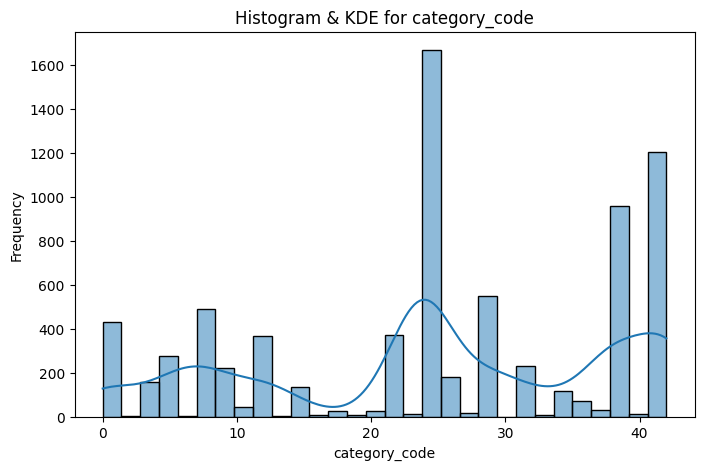


Summary Statistics for country_code:
count    7610.000000
mean      140.056118
std        47.260881
min         5.000000
25%       164.000000
50%       164.000000
75%       166.000000
max       173.000000
Name: country_code, dtype: float64


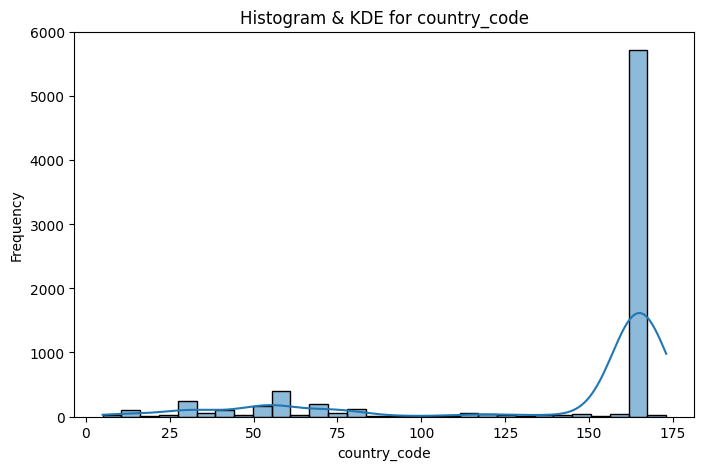


Summary Statistics for state_code:
count    7610.000000
mean       35.851623
std        15.453326
min         1.000000
25%        34.000000
50%        45.000000
75%        45.000000
max        50.000000
Name: state_code, dtype: float64


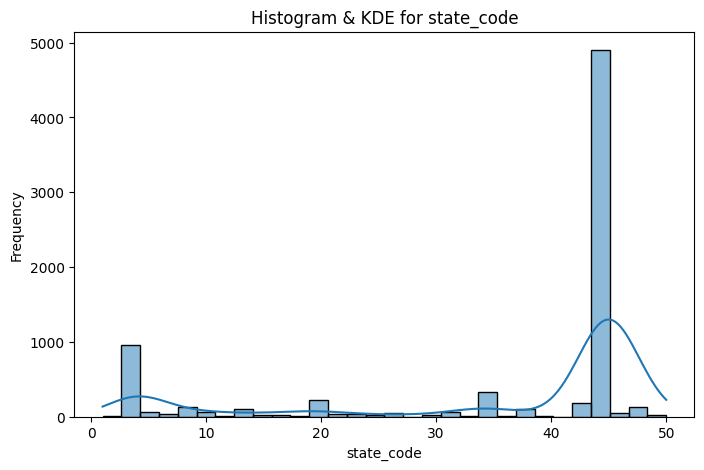


Summary Statistics for city:
count     7610.000000
mean      6966.693784
std       3004.995543
min          1.000000
25%       5097.000000
50%       8216.000000
75%       9390.000000
max      10628.000000
Name: city, dtype: float64


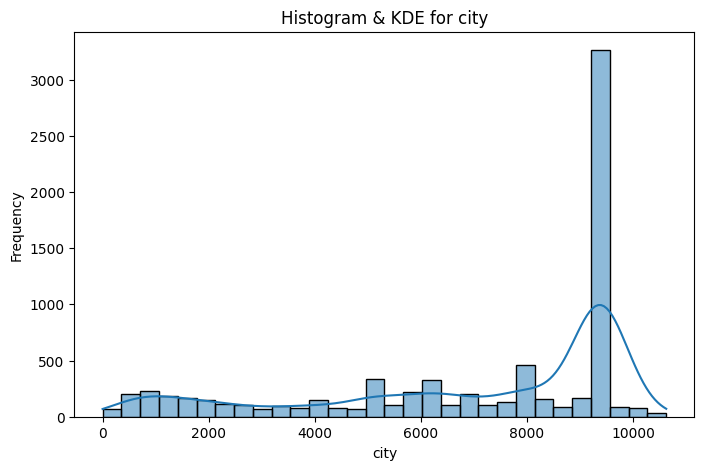


Summary Statistics for region:
count    7610.000000
mean     4129.679984
std      1845.474440
min        10.000000
25%      2886.000000
50%      4450.000000
75%      5833.000000
max      5843.000000
Name: region, dtype: float64


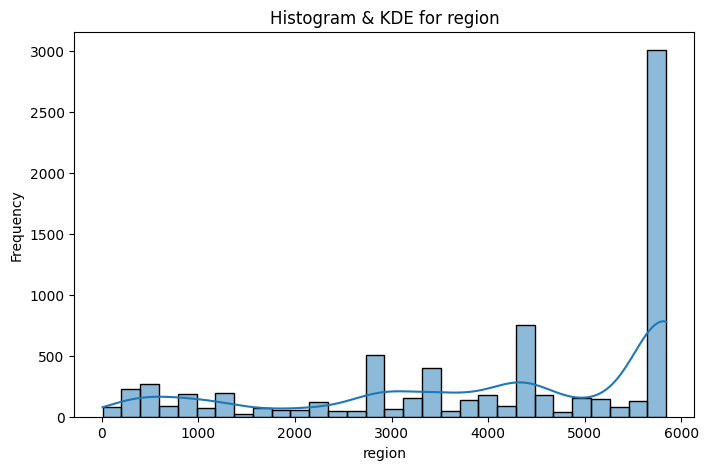


Summary Statistics for investment_rounds:
count    7610.000000
mean        2.147059
std         0.532929
min         1.000000
25%         2.147059
50%         2.147059
75%         2.147059
max        32.000000
Name: investment_rounds, dtype: float64


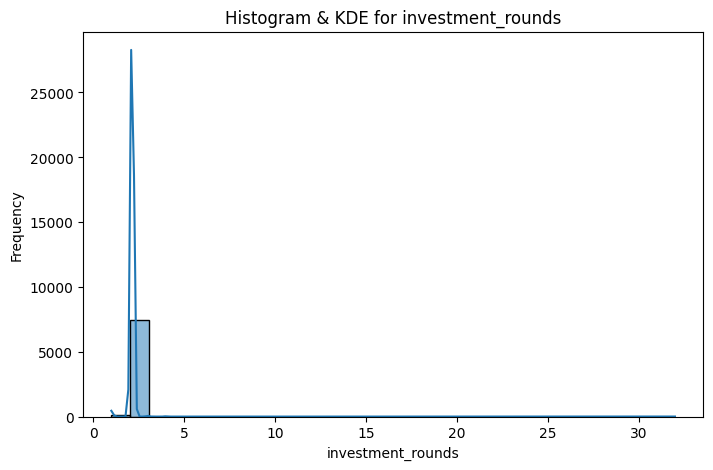


Summary Statistics for invested_companies:
count    7610.000000
mean        1.904412
std         0.405922
min         1.000000
25%         1.904412
50%         1.904412
75%         1.904412
max        24.000000
Name: invested_companies, dtype: float64


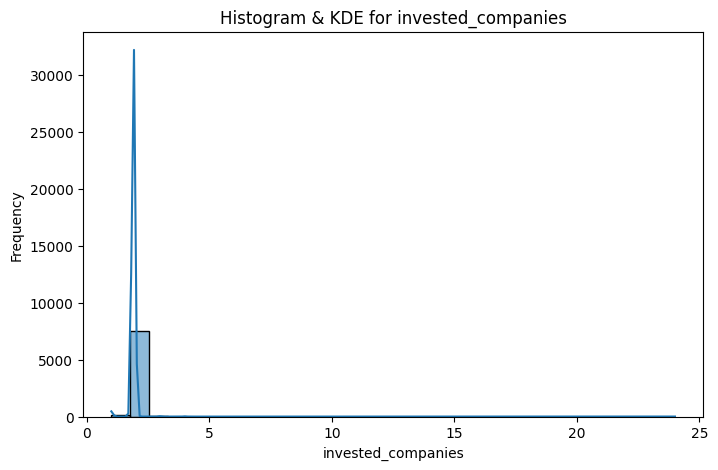


Summary Statistics for funding_rounds:
count    7610.000000
mean        1.935149
std         0.650072
min         1.000000
25%         1.935149
50%         1.935149
75%         1.935149
max        13.000000
Name: funding_rounds, dtype: float64


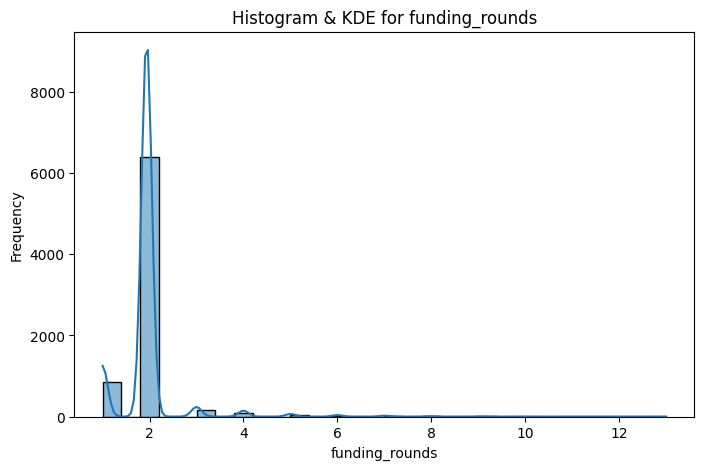


Summary Statistics for funding_total_usd:
count    7.610000e+03
mean     2.320866e+07
std      7.011363e+07
min      1.000000e+03
25%      2.320866e+07
50%      2.320866e+07
75%      2.320866e+07
max      5.700000e+09
Name: funding_total_usd, dtype: float64


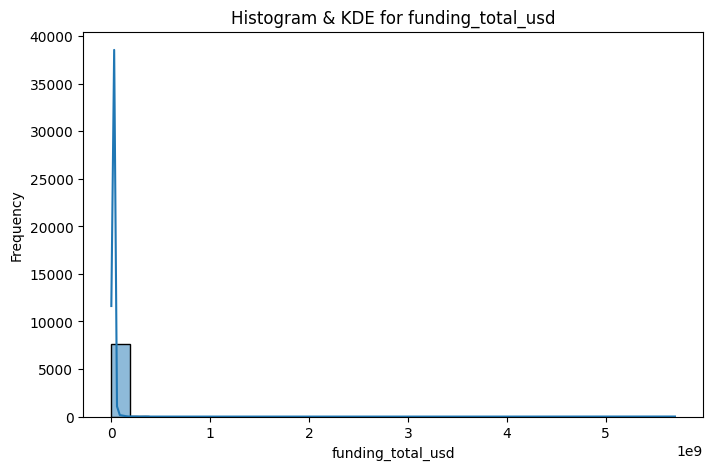


Summary Statistics for milestones:
count    7610.000000
mean        1.467855
std         0.558329
min         1.000000
25%         1.000000
50%         1.467855
75%         1.467855
max         8.000000
Name: milestones, dtype: float64


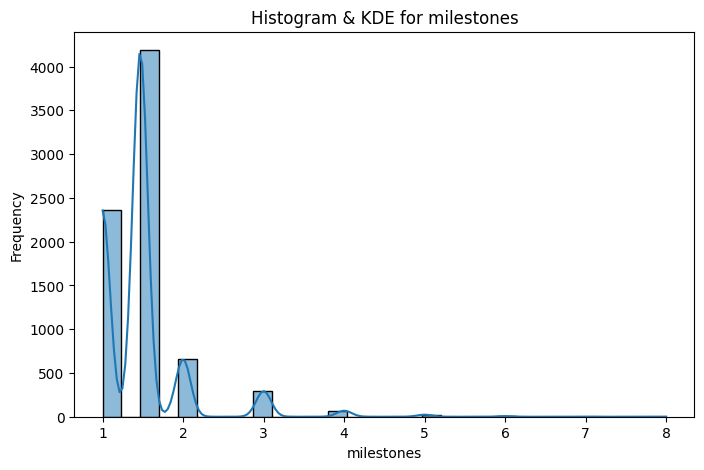


Summary Statistics for relationships:
count    7610.000000
mean        4.470080
std        15.075922
min         1.000000
25%         1.000000
50%         4.000000
75%         4.470080
max      1189.000000
Name: relationships, dtype: float64


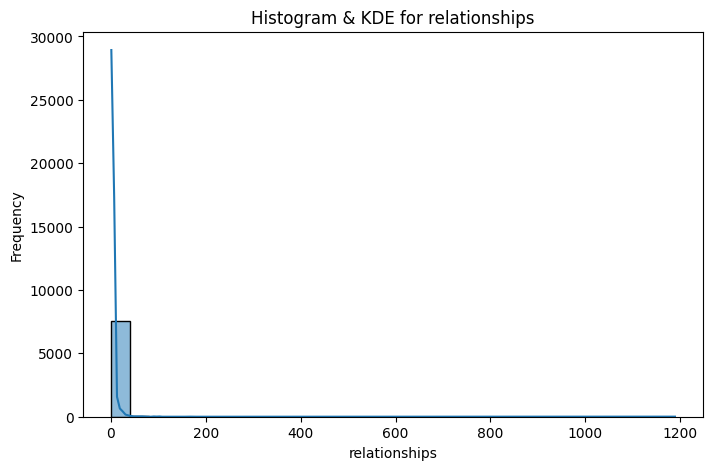


Summary Statistics for lat:
count    7610.000000
mean       38.086569
std        11.544691
min       -45.878760
25%        37.774929
50%        38.086569
75%        40.712775
max        69.649205
Name: lat, dtype: float64


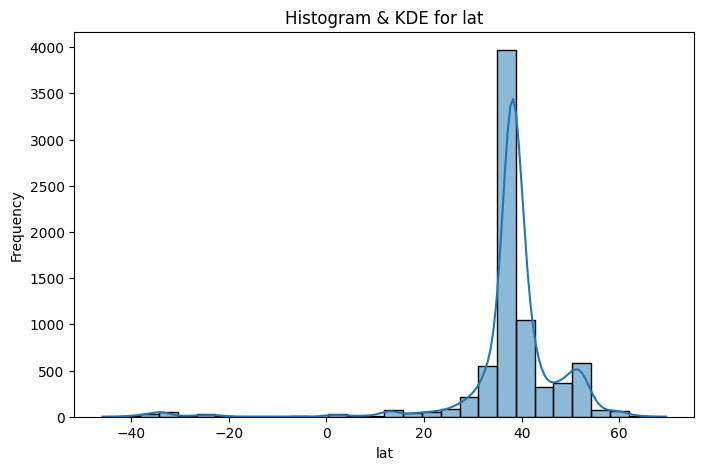


Summary Statistics for lng:
count    7610.000000
mean      -53.668564
std        53.027175
min      -157.858333
25%       -82.956431
50%       -53.668564
75%       -53.668564
max       174.776236
Name: lng, dtype: float64


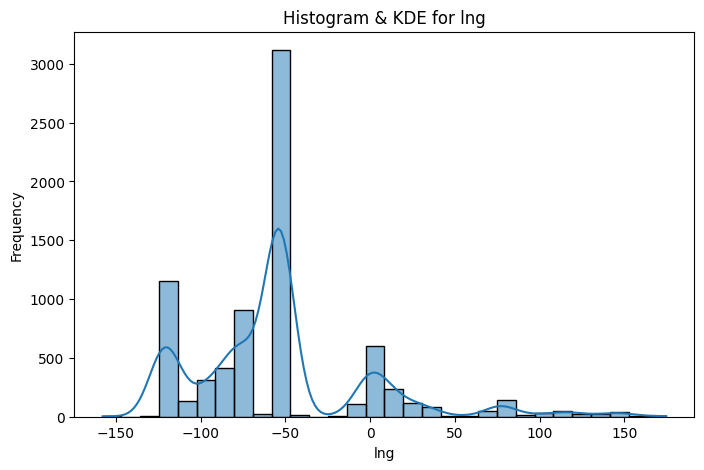


Summary Statistics for roi:
count    7610.000000
mean       30.346231
std        10.854609
min         0.518135
25%        30.346231
50%        30.346231
75%        30.346231
max       954.548926
Name: roi, dtype: float64


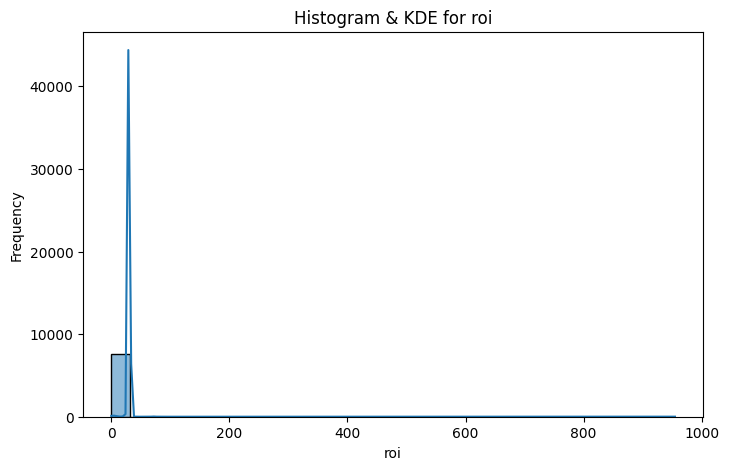


Summary Statistics for founded_year:
count    7610.000000
mean     2005.234420
std         6.926151
min      1901.000000
25%      2005.234420
50%      2005.234420
75%      2008.000000
max      2013.000000
Name: founded_year, dtype: float64


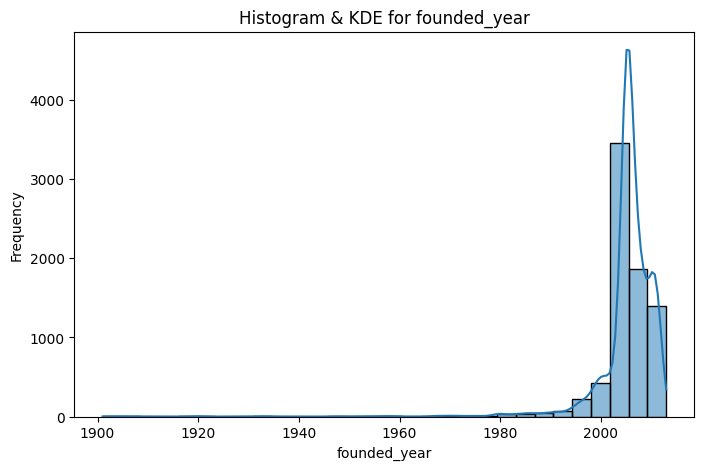


Summary Statistics for company_age:
count    7610.000000
mean       19.765580
std         6.926151
min        12.000000
25%        17.000000
50%        19.765580
75%        19.765580
max       124.000000
Name: company_age, dtype: float64


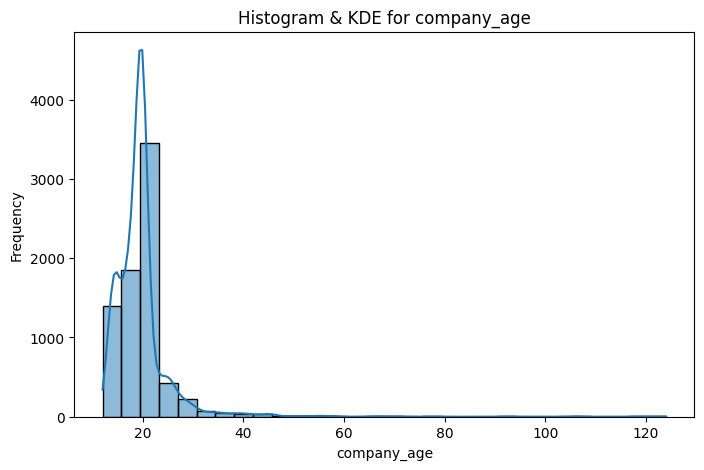


Summary Statistics for active_status:
count    7610.000000
mean        0.883296
std         0.321067
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: active_status, dtype: float64


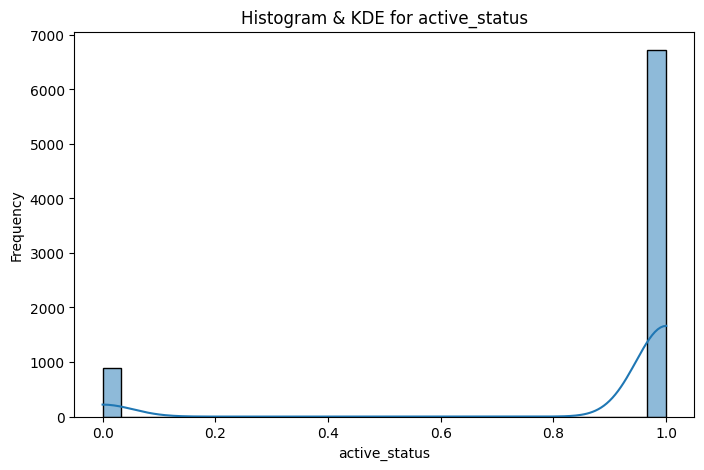

In [12]:
# Numerical Features Analysis
numeric_cols = df.select_dtypes(include=[np.number]).columns

for col in numeric_cols:
    print(f"\nSummary Statistics for {col}:")
    print(df[col].describe())

    # Histogram + KDE
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Histogram & KDE for {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()



Frequency Distribution for id:
id
c:141573    1
c:1         1
c:10        1
c:100       1
c:10000     1
c:10001     1
c:10002     1
c:10003     1
c:100042    1
c:10005     1
Name: count, dtype: int64


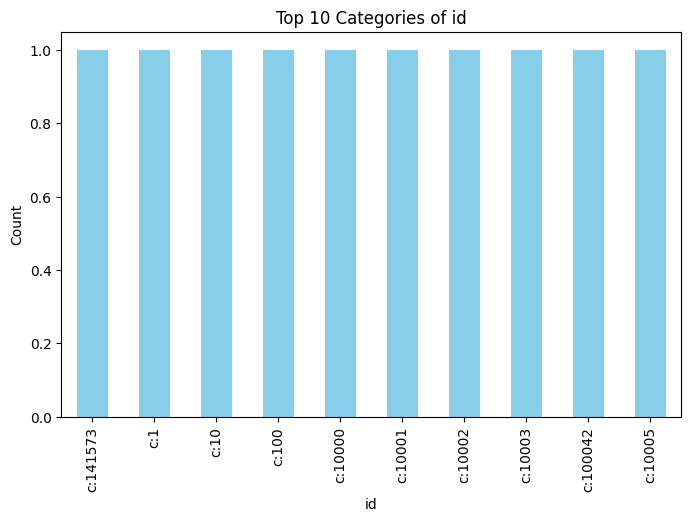

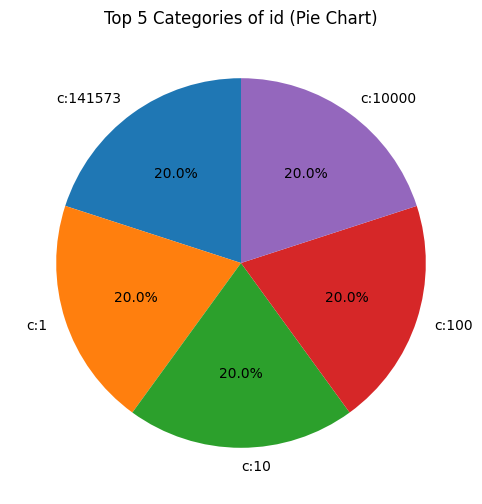


Frequency Distribution for entity_type:
entity_type
Company    7610
Name: count, dtype: int64


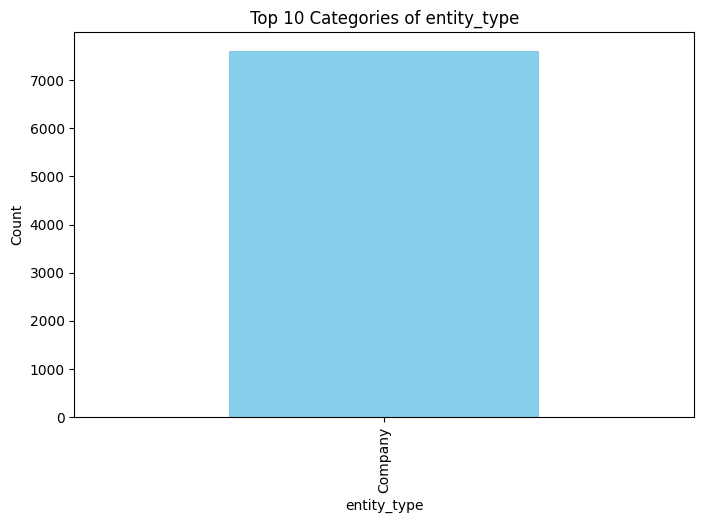

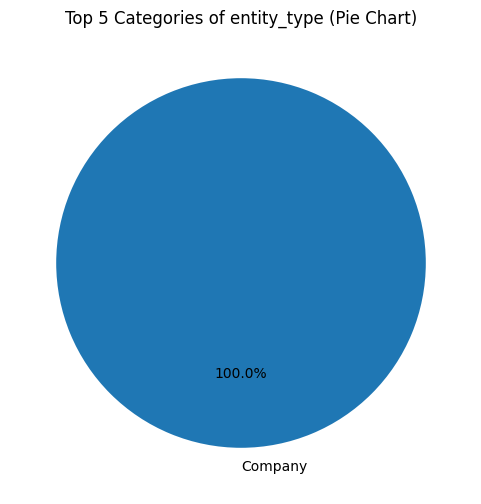


Frequency Distribution for name:
name
(fluff)Friends              2
3D Travel, Inc              1
Everest Group               1
Fahrenheit Marketing        1
ArmorActive                 1
Weboffice.com               1
Game Disrupt                1
GeckoGo                     1
Discovery Communications    1
Sun/Oracle                  1
Name: count, dtype: int64


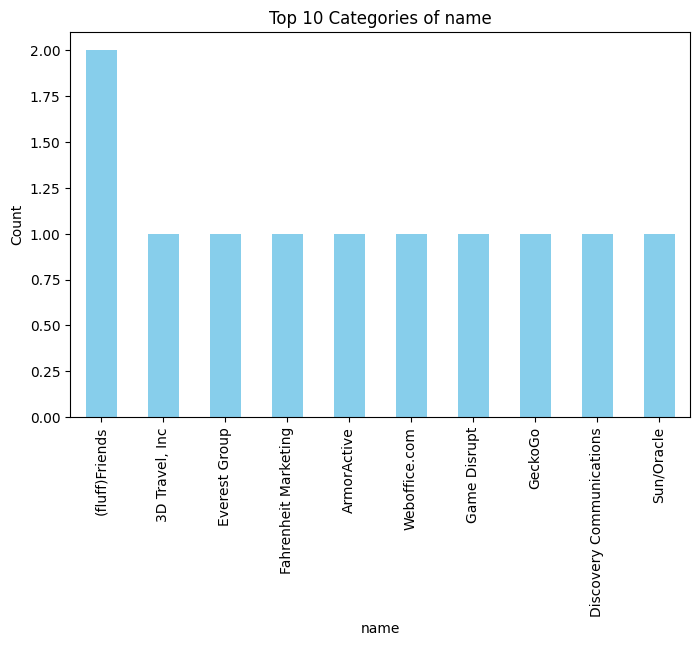

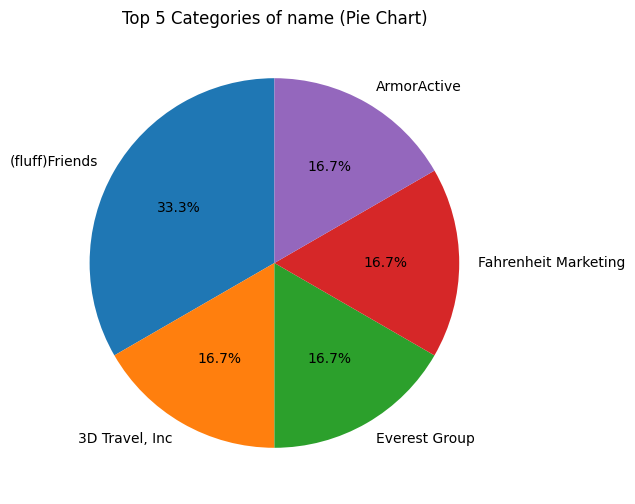


Frequency Distribution for normalized_name:
normalized_name
triggero                    2
dabble                      2
everest group               1
fahrenheit marketing        1
armoractive                 1
weboffice                   1
game disrupt                1
geckogo                     1
discovery communications    1
sun oracle                  1
Name: count, dtype: int64


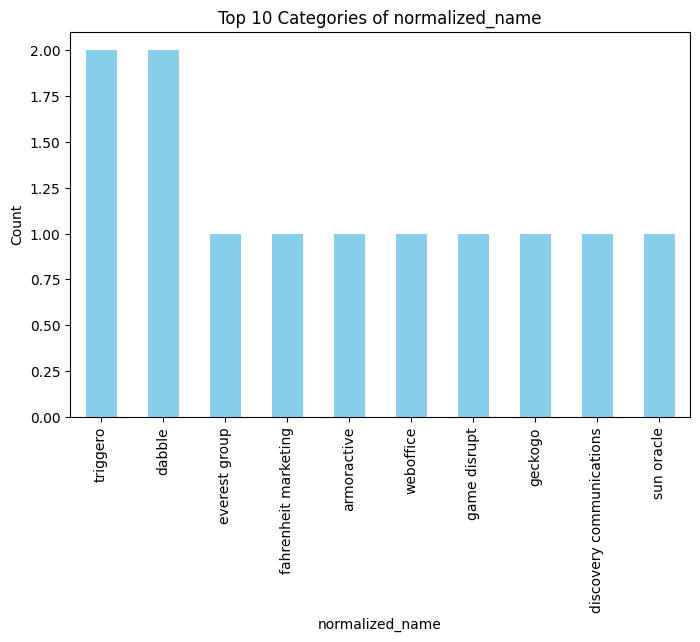

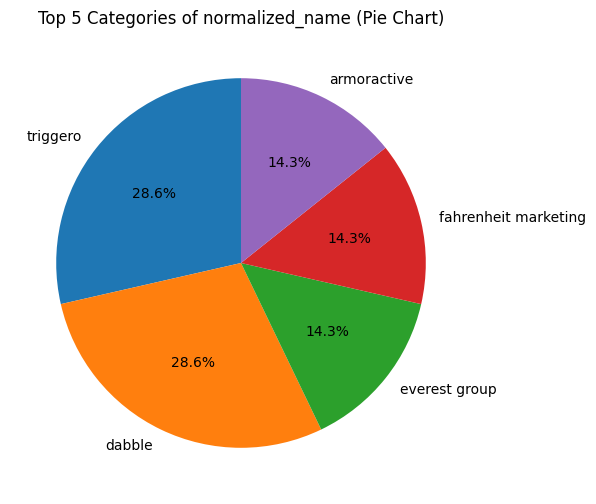


Frequency Distribution for status:
status
operating    6662
acquired      674
closed        214
ipo            60
Name: count, dtype: int64


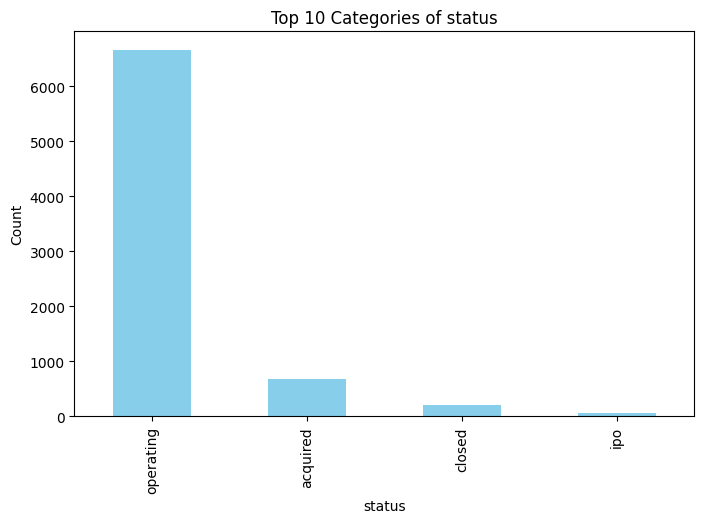

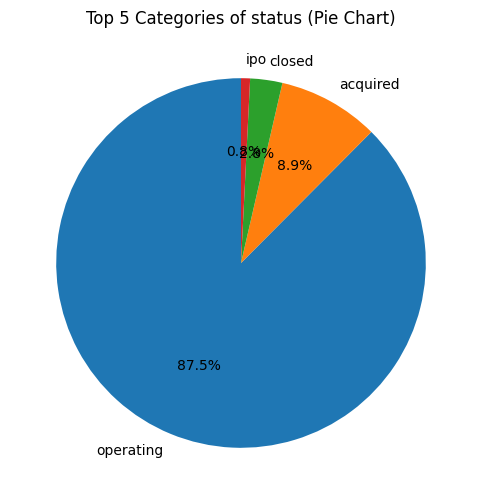


Frequency Distribution for founded_at:
founded_at
2007-01-01    2956
2011-01-01     191
2008-01-01     178
2006-01-01     149
2010-01-01     118
2005-01-01     104
2004-01-01      95
2001-01-01      93
2000-01-01      90
1999-01-01      86
Name: count, dtype: int64


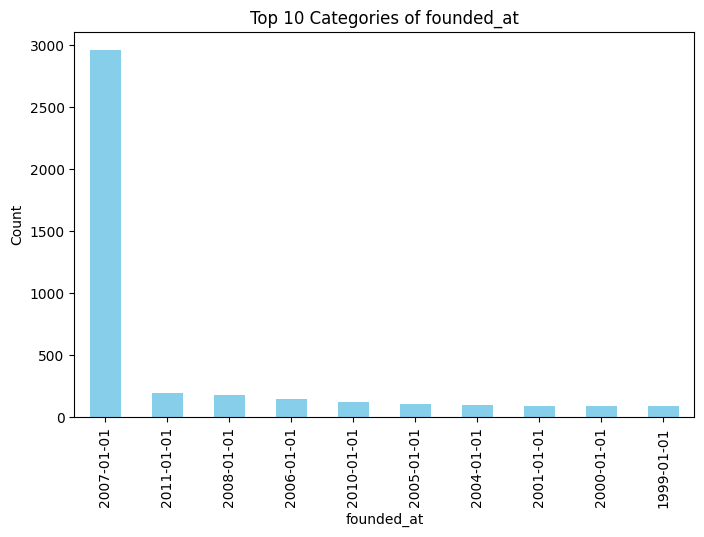

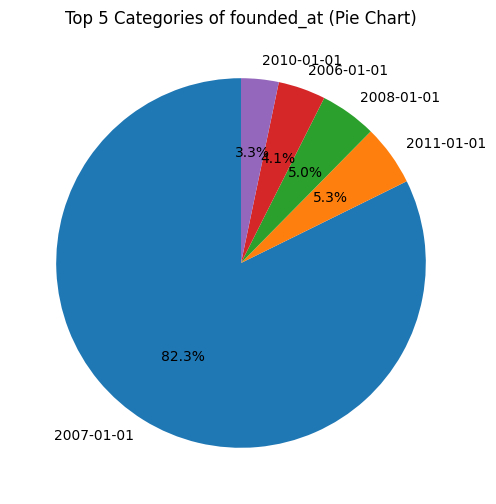


Frequency Distribution for closed_at:
closed_at
2012-01-01    7404
2013-07-01       9
2013-06-01       9
2010-01-01       8
2009-01-01       7
2013-05-01       7
2011-01-01       7
2013-01-01       3
2010-07-01       3
2011-12-17       2
Name: count, dtype: int64


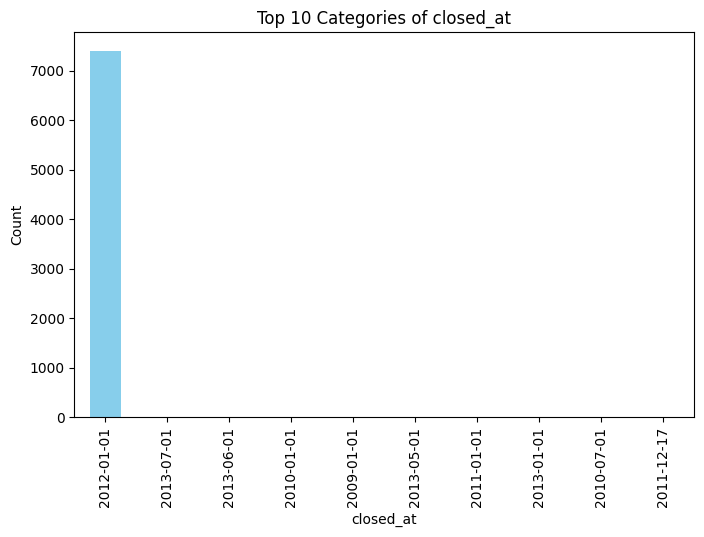

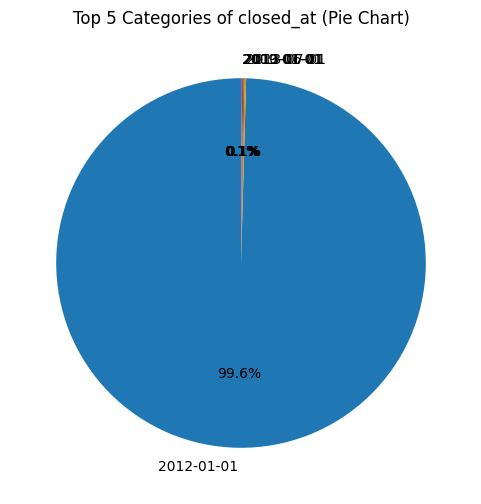


Frequency Distribution for domain:
domain
bakespace.com                1490
startups.co.uk                  2
exaprotect.com                  2
ibm.com                         2
triggero.com                    2
brandregard.com                 2
illumix.com                     1
populis.com                     1
jacksonfish.com                 1
gainsboroughshowers.co.uk       1
Name: count, dtype: int64


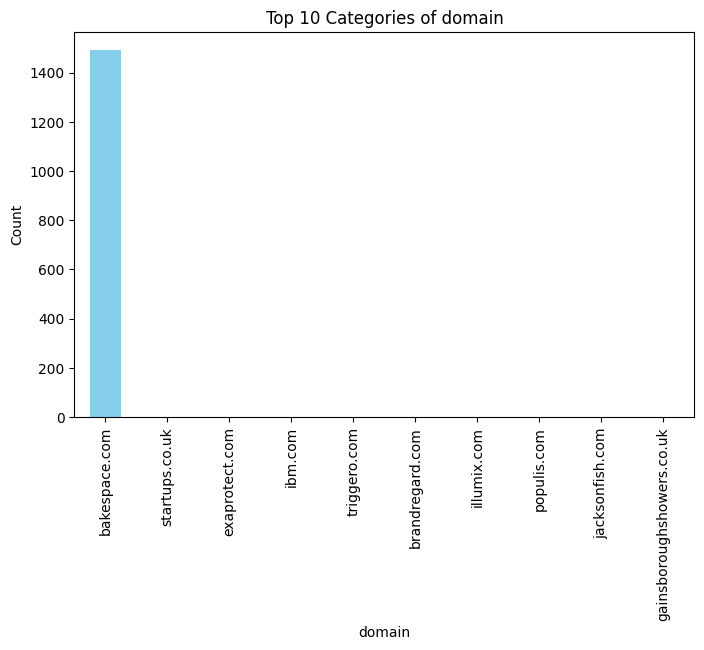

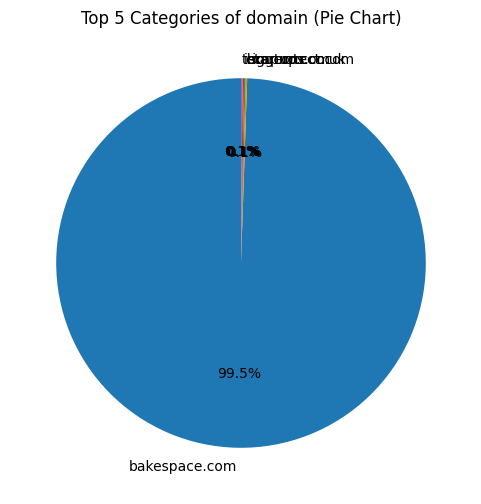


Frequency Distribution for homepage_url:
homepage_url
http://www.brandregard.com              1490
http://www.startups.co.uk                  2
http://www.exaprotect.com                  2
http://www.triggerO.com                    2
http://www.atlasct.com                     1
http://www.jacksonfish.com                 1
http://www.gainsboroughshowers.co.uk       1
http://www.ihomes.co.in                    1
http://www.saveme4later.com                1
http://joinville.se                        1
Name: count, dtype: int64


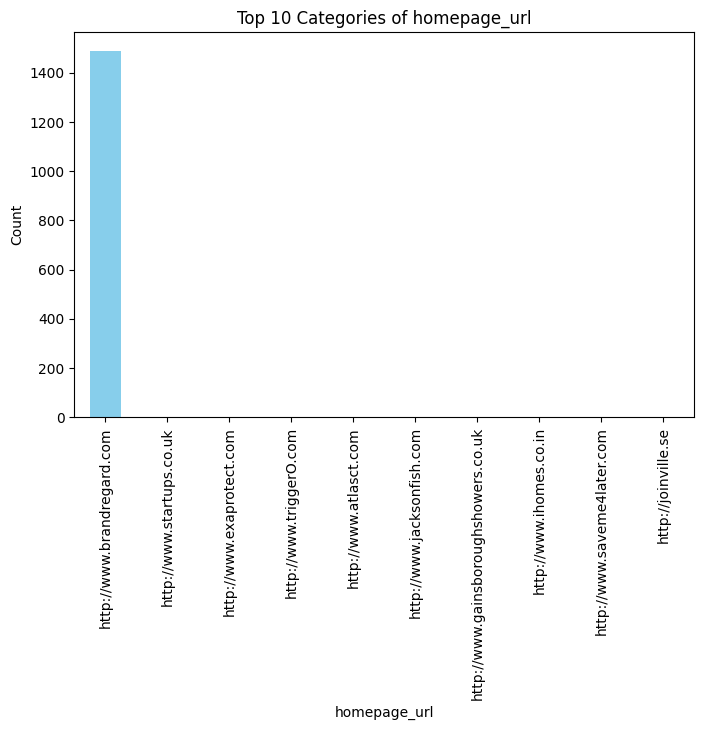

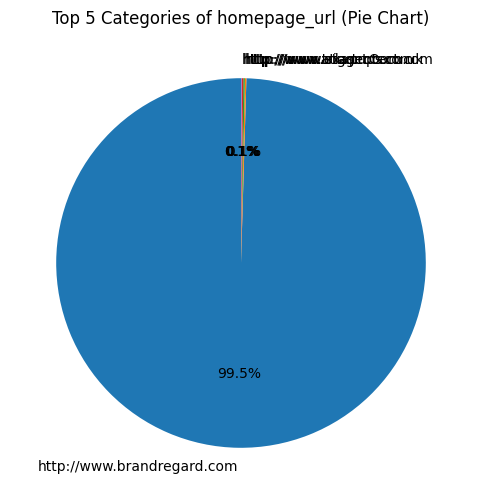


Frequency Distribution for twitter_username:
twitter_username
CrowdSpot_app    3944
poptent             2
brandregard         2
evdomains           2
xsolve              2
edigma              2
paperstreet         2
bertramgeck         2
triggeronweb        2
startupsfeed        2
Name: count, dtype: int64


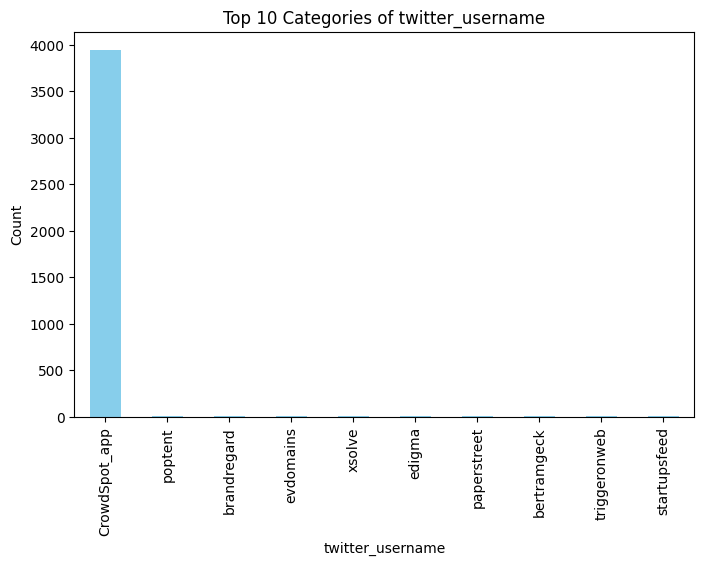

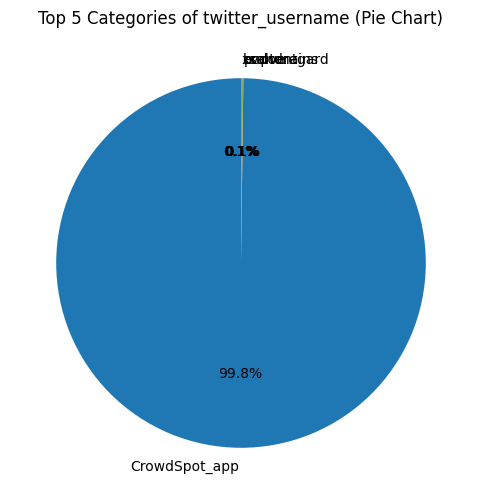


Frequency Distribution for short_description:
short_description
Not Provided                                                                                                                                    7273
VIAP is an interactive software for film and television that allows viewers to buy, share and learn about the object on the screen.                1
Interwoven provides content management systems and related products to maximize online business performance.                                       1
HourVille, an online social platform, lets users buy and sell anything that can be priced by the hour by providing interactive online tools.       1
PressPad is a mobile publishing platform for B2C, publishers, and custom publishing businesses.                                                    1
Clearwire provides a wireless high-speed internet service that allows customers to connect to the internet using licensed spectrum.                1
Citizenside is a news video and photo age

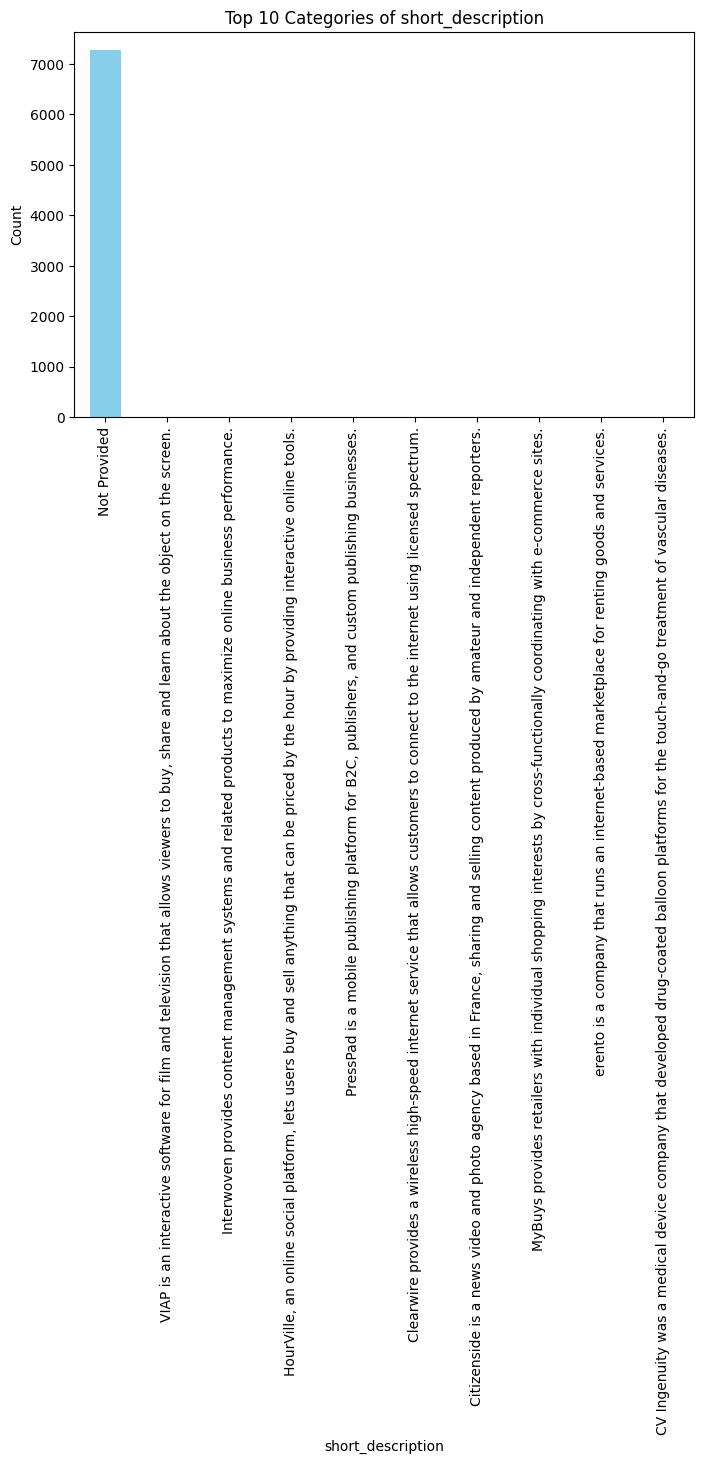

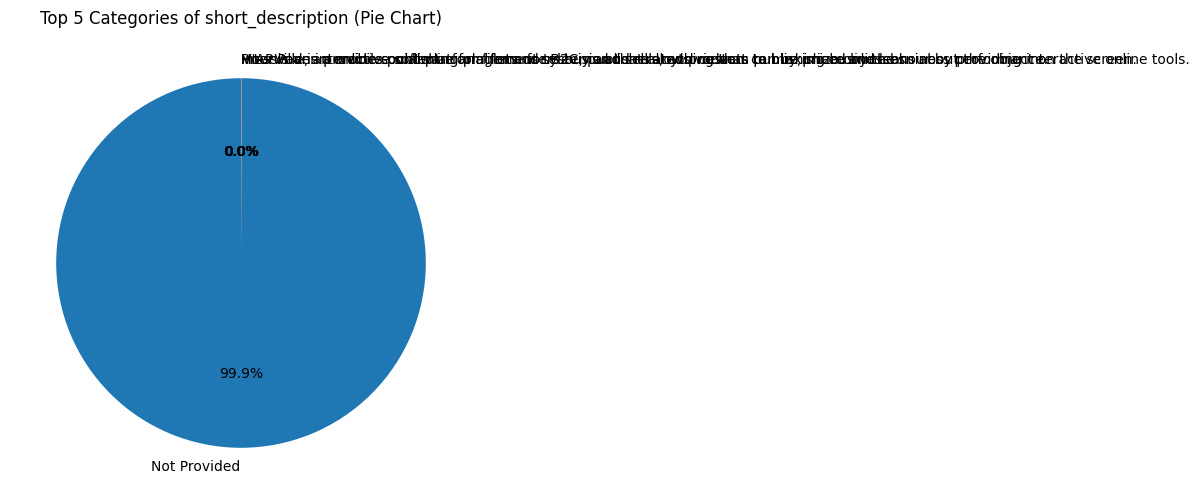


Frequency Distribution for description:
description
Not Provided                   3844
Digital Marketing Agency          6
software solutions                4
Digital Agency                    4
Social Network                    4
Full Service Digital Agency       3
Social Gaming Company             3
Web Design                        3
Social Media Marketing            3
Web Design and Development        3
Name: count, dtype: int64


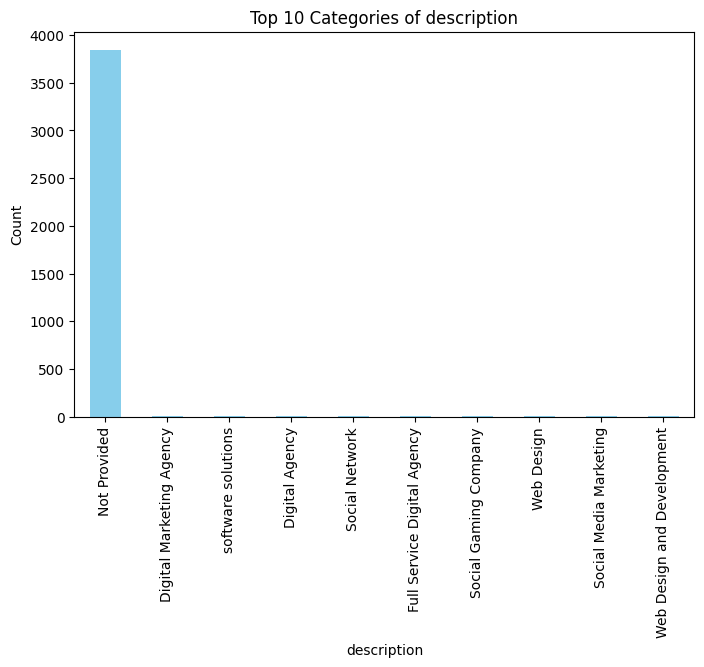

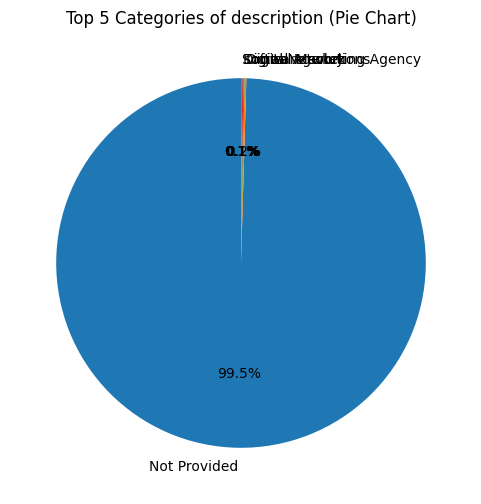


Frequency Distribution for tag_list:
tag_list
koh-tao, koh-tao-paketresor, paketresor-koh-tao                      3071
techcrunch50, tc50                                                      6
web2ireland                                                             4
real-estate                                                             3
khao-lak, paketresor-khao-lak, resa, resor-khao-lak                     3
koh-lanta-paketresor, paketresor-koh-lanta, koh-lanta, paketresor       3
social-bookmarks                                                        3
techstars, techstars-nyc-summer-2011                                    2
mmo                                                                     2
music                                                                   2
Name: count, dtype: int64


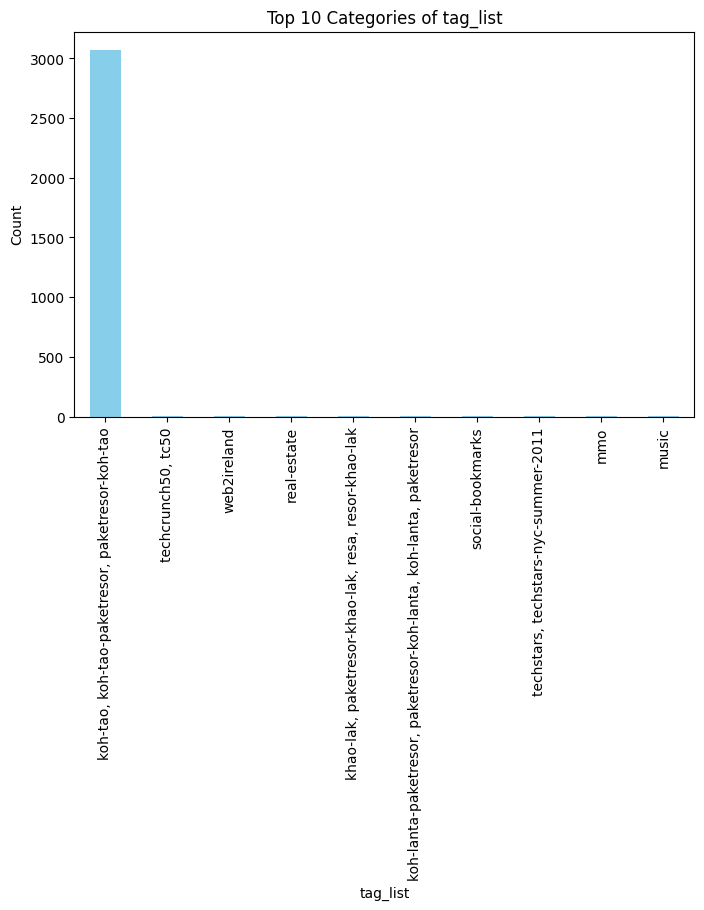

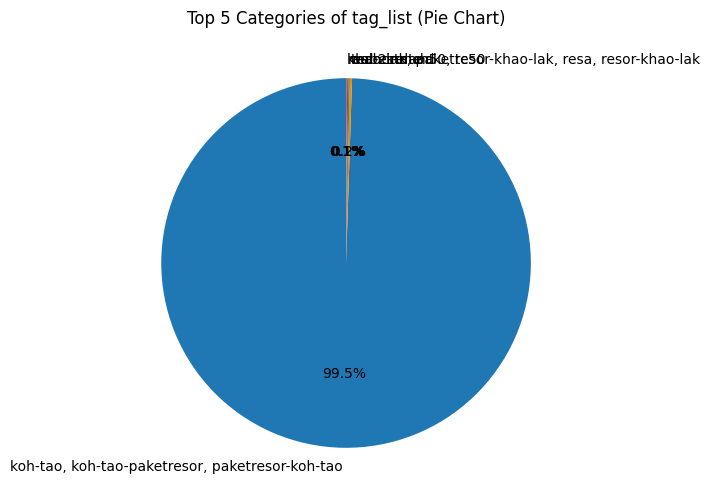


Frequency Distribution for first_investment_at:
first_investment_at
2011-04-01    7482
2008-08-01       4
2007-01-01       3
2012-09-27       2
2007-09-01       2
2009-11-01       2
2011-10-26       2
2003-11-17       1
2008-06-16       1
2010-11-29       1
Name: count, dtype: int64


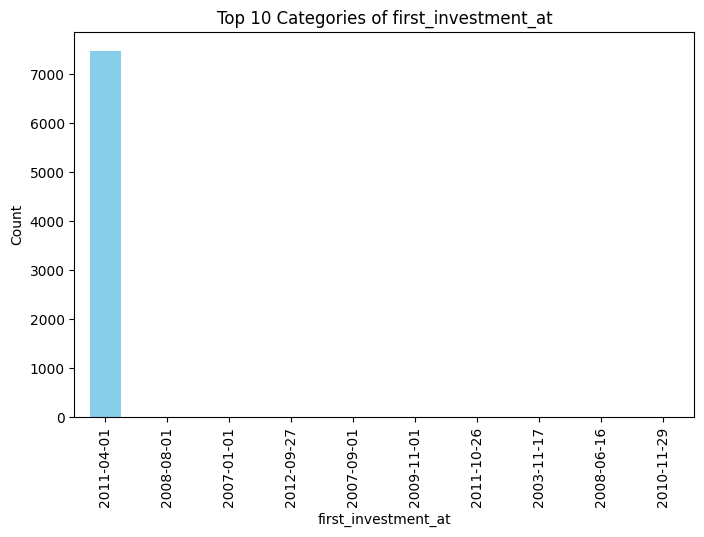

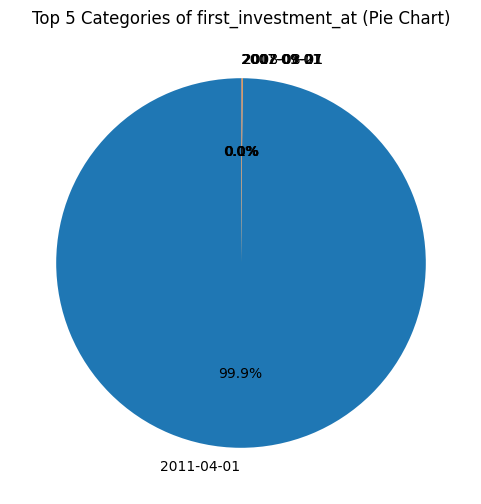


Frequency Distribution for last_investment_at:
last_investment_at
2011-04-01    7480
2008-08-01       3
2013-09-24       2
2011-03-01       2
2012-09-27       2
2012-06-01       2
2010-08-01       2
2009-11-01       2
2013-08-01       2
2013-10-03       2
Name: count, dtype: int64


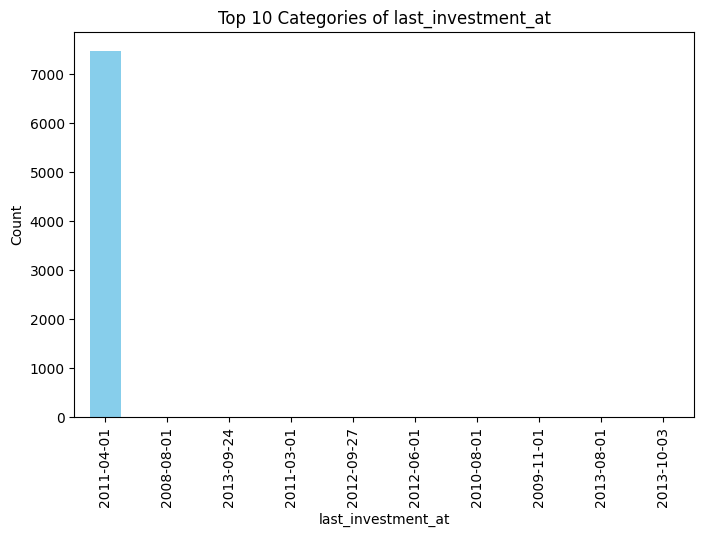

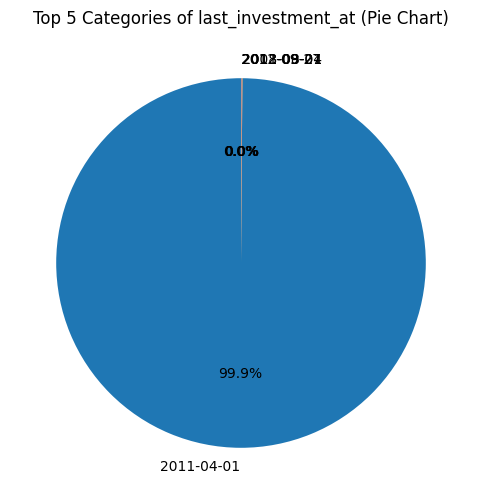


Frequency Distribution for first_funding_at:
first_funding_at
2007-01-01    6140
2008-01-01      35
2007-10-01      25
2011-01-01      21
2006-01-01      20
2007-09-01      20
2011-11-01      18
2011-09-01      15
2007-08-01      15
2011-07-01      15
Name: count, dtype: int64


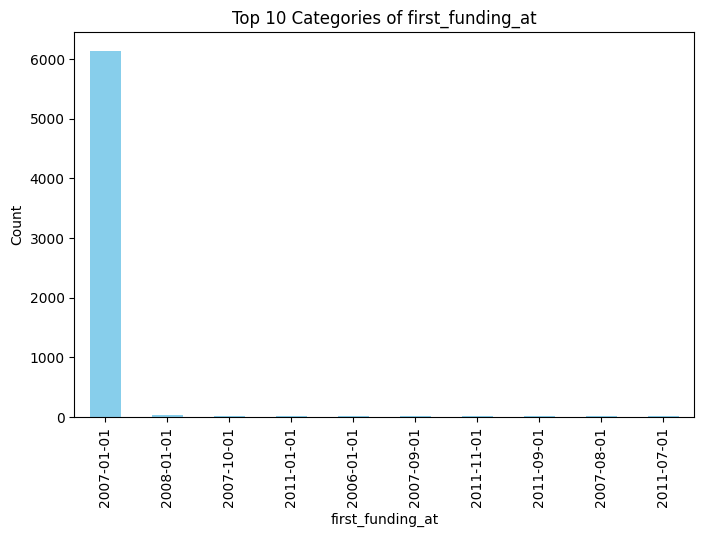

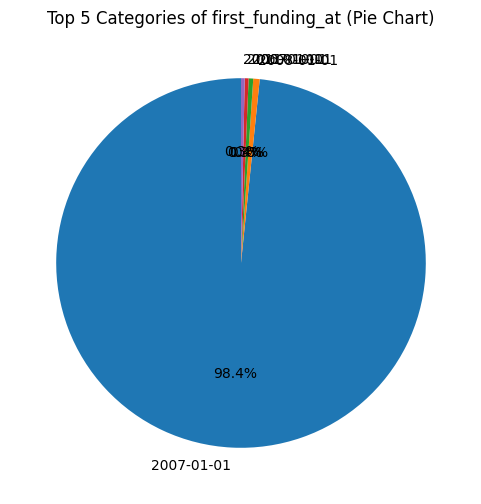


Frequency Distribution for last_funding_at:
last_funding_at
2008-01-01    6122
2007-01-01      28
2007-10-01      18
2007-09-01      14
2011-09-01      14
2007-11-01      13
2011-01-01      13
2011-07-01      13
2007-08-01      12
2011-11-01      10
Name: count, dtype: int64


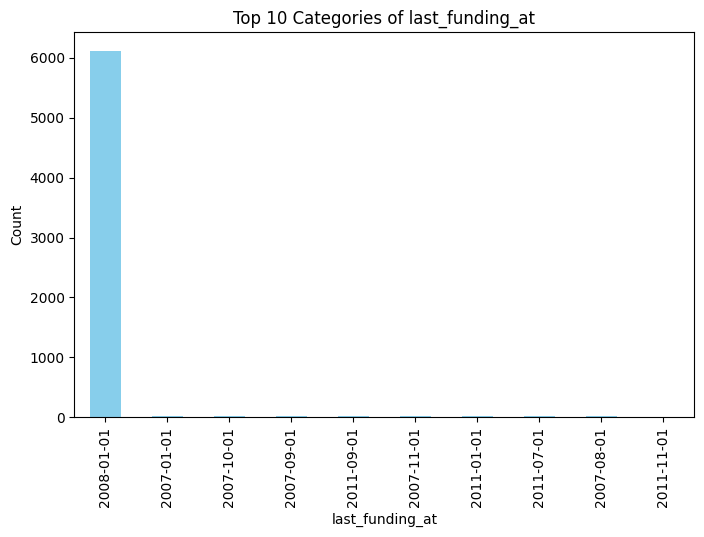

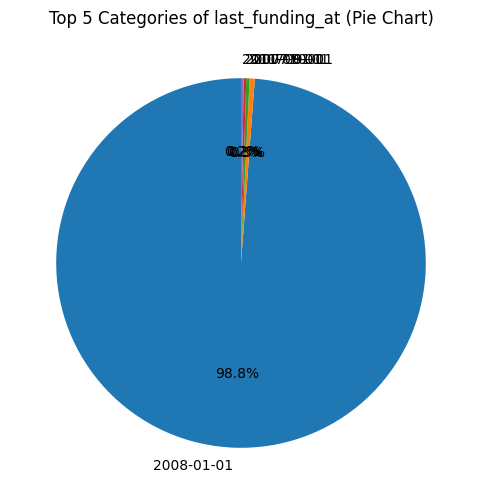


Frequency Distribution for first_milestone_at:
first_milestone_at
2011-01-01    4311
2010-01-01      85
2012-01-01      80
2008-01-01      78
2007-01-01      75
2009-01-01      71
2011-09-01      61
2006-01-01      58
2011-07-01      55
2011-06-01      50
Name: count, dtype: int64


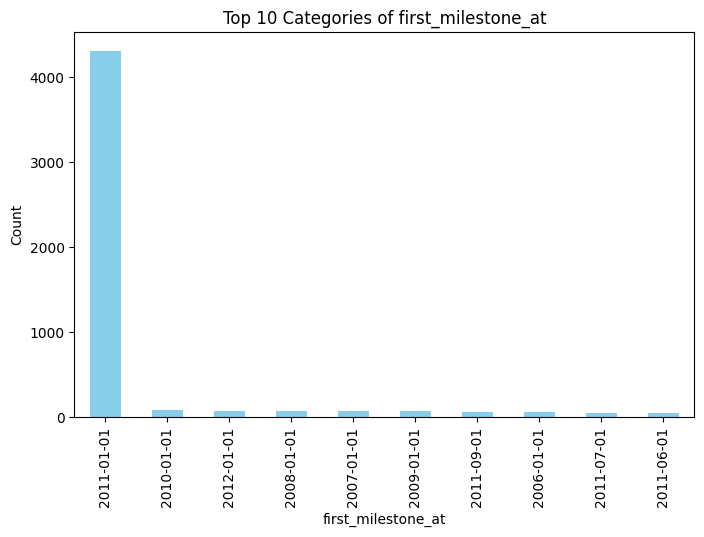

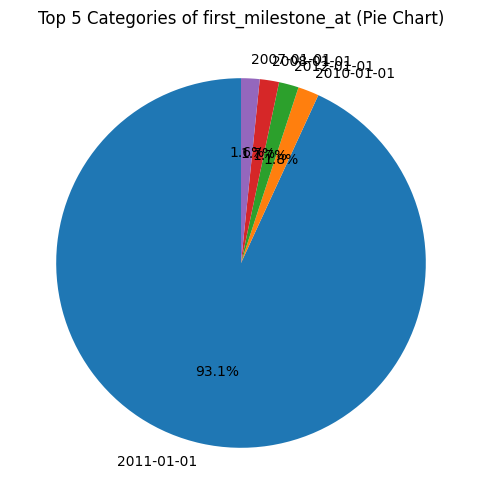


Frequency Distribution for last_milestone_at:
last_milestone_at
2011-01-01    4292
2012-01-01      70
2010-01-01      64
2009-01-01      56
2011-09-01      54
2013-01-01      53
2011-07-01      49
2008-01-01      49
2007-01-01      46
2011-06-01      46
Name: count, dtype: int64


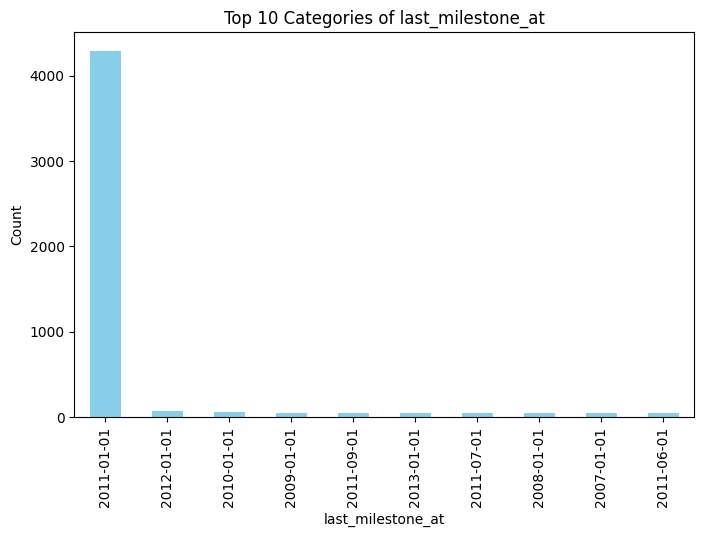

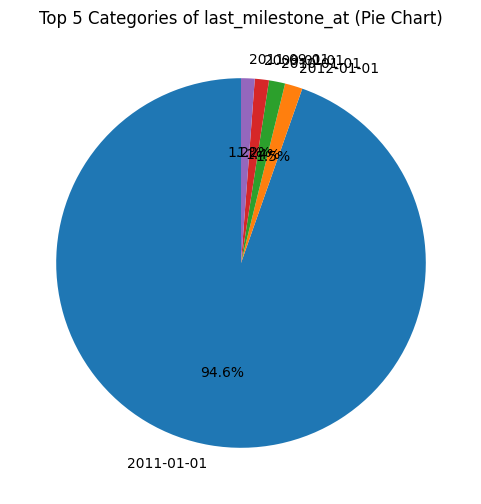

In [13]:
#Categorical Features Analysis
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    print(f"\nFrequency Distribution for {col}:")
    print(df[col].value_counts().head(10))

    # Bar Plot (Top 10)
    plt.figure(figsize=(8, 5))
    df[col].value_counts().head(10).plot(kind='bar', color='skyblue')
    plt.title(f"Top 10 Categories of {col}")
    plt.ylabel("Count")
    plt.xlabel(col)
    plt.show()

    # Pie Chart (Top 5 for readability)
    plt.figure(figsize=(6, 6))
    df[col].value_counts().head(5).plot(kind='pie', autopct='%1.1f%%', startangle=90)
    plt.title(f"Top 5 Categories of {col} (Pie Chart)")
    plt.ylabel("")
    plt.show()


# Bivariate Data Analysis

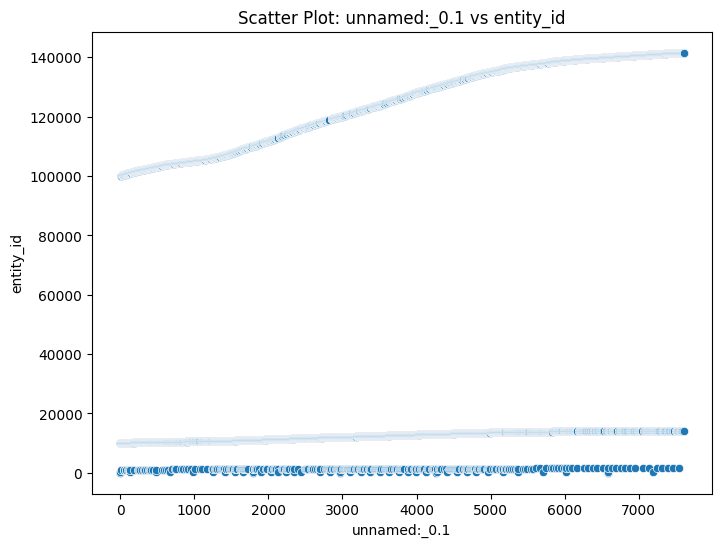

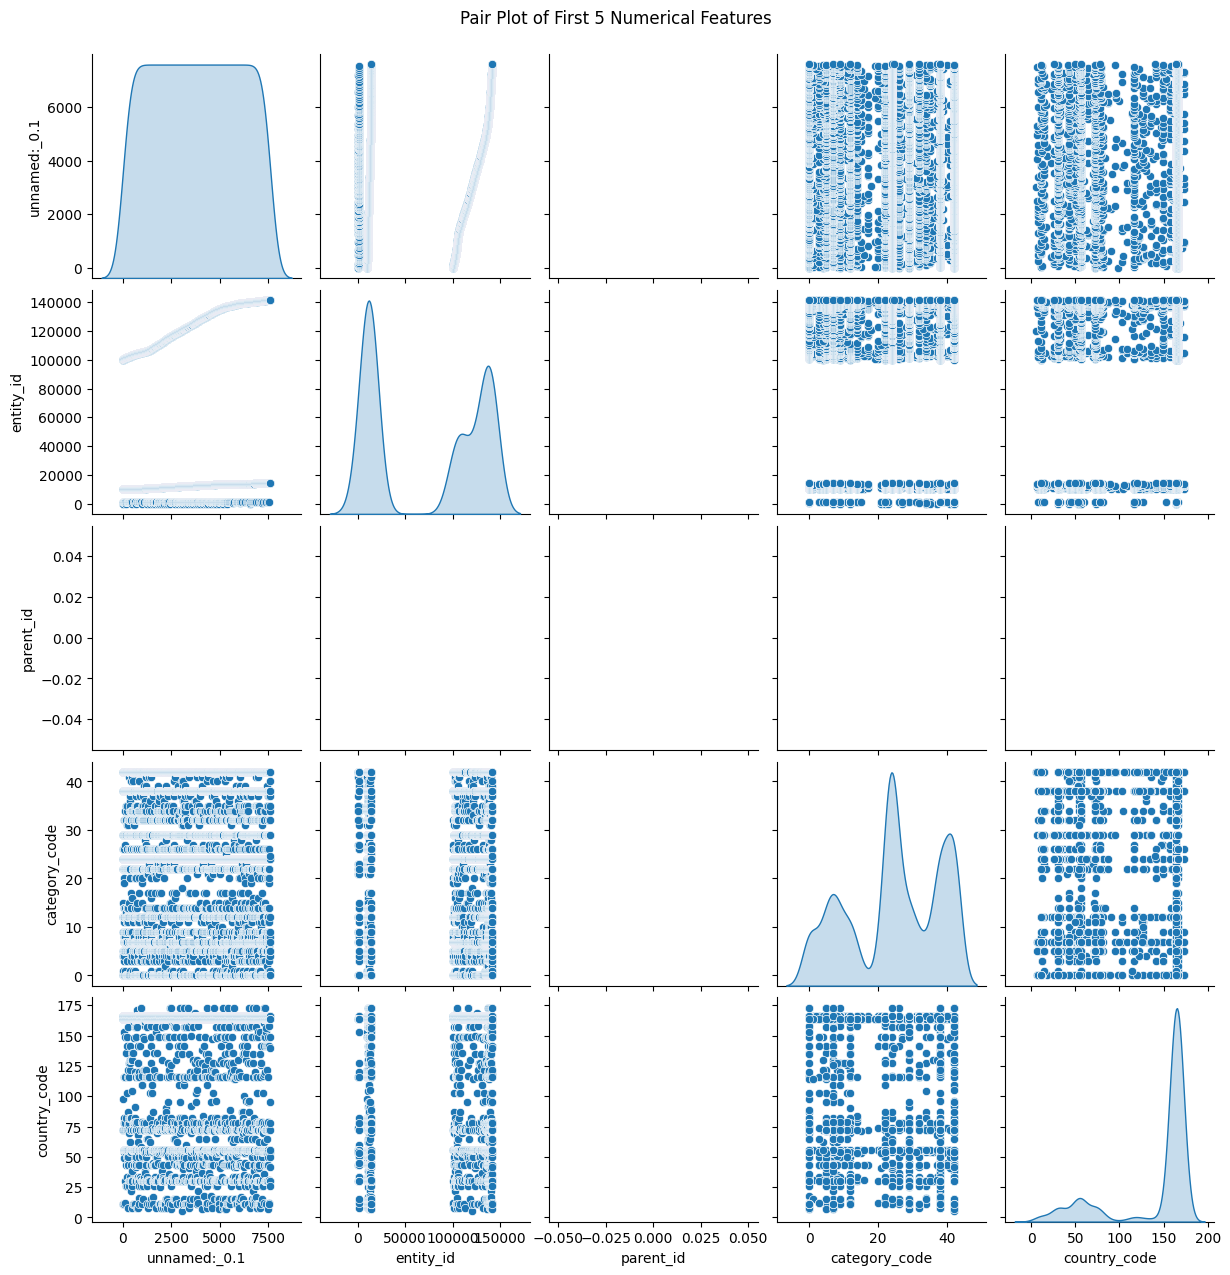

In [14]:
#  Numerical vs Numerical: Scatter Plots & Pair Plots
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Scatter plot for first two numerical columns
if len(numeric_cols) >= 2:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df[numeric_cols[0]], y=df[numeric_cols[1]])
    plt.title(f"Scatter Plot: {numeric_cols[0]} vs {numeric_cols[1]}")
    plt.show()

# Pair plot for first 5 numerical features
sns.pairplot(df[numeric_cols[:5]], diag_kind='kde')
plt.suptitle("Pair Plot of First 5 Numerical Features", y=1.02)
plt.show()


Pearson Correlation Matrix:
                    unnamed:_0.1  entity_id  parent_id  category_code  \
unnamed:_0.1            1.000000   0.384778        NaN      -0.018985   
entity_id               0.384778   1.000000        NaN      -0.117769   
parent_id                    NaN        NaN        NaN            NaN   
category_code          -0.018985  -0.117769        NaN       1.000000   
country_code           -0.028699   0.012378        NaN       0.016625   
state_code              0.064740   0.152891        NaN       0.024702   
city                    0.012488   0.095925        NaN       0.010362   
region                  0.031491   0.105919        NaN       0.021152   
investment_rounds      -0.006108  -0.017369        NaN       0.017687   
invested_companies     -0.006075  -0.019065        NaN       0.019285   
funding_rounds         -0.011735  -0.090294        NaN      -0.034865   
funding_total_usd       0.000273  -0.025416        NaN      -0.010861   
milestones            

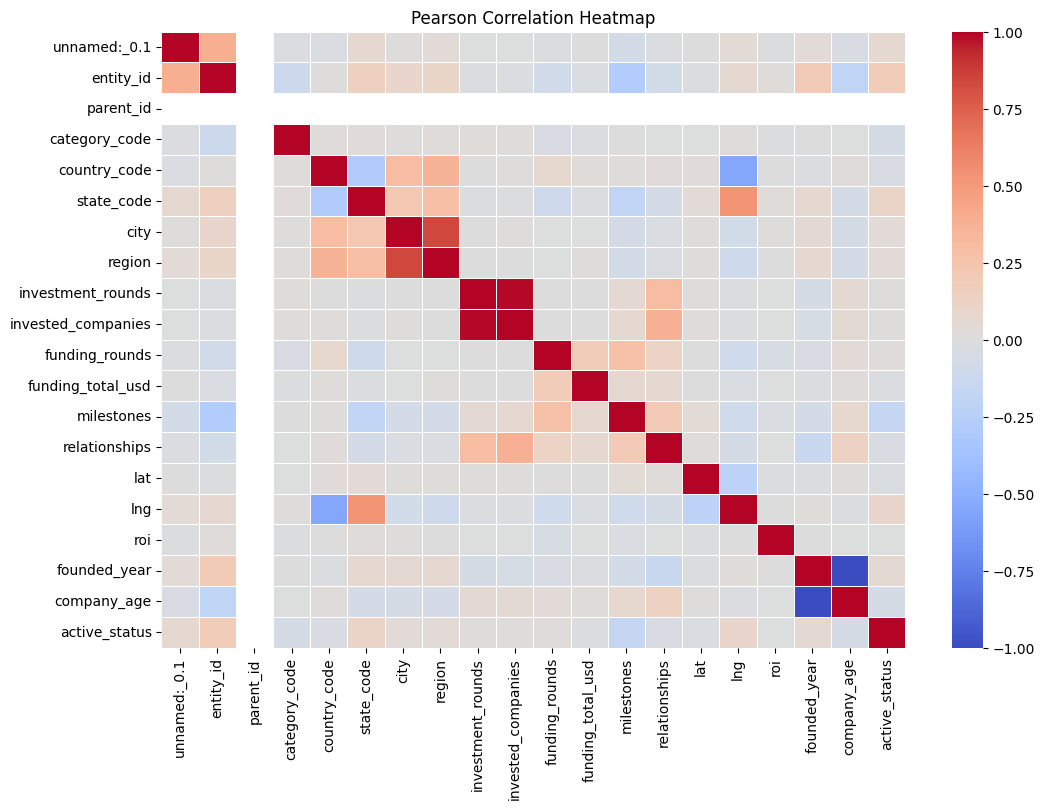

In [15]:
# Correlation Coefficients
# Pearson correlation
pearson_corr = df[numeric_cols].corr(method='pearson')
print("\nPearson Correlation Matrix:")
print(pearson_corr)

# Spearman correlation
spearman_corr = df[numeric_cols].corr(method='spearman')
print("\nSpearman Correlation Matrix:")
print(spearman_corr)

# Heatmap for Pearson correlation
plt.figure(figsize=(12, 8))
sns.heatmap(pearson_corr, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("Pearson Correlation Heatmap")
plt.show()

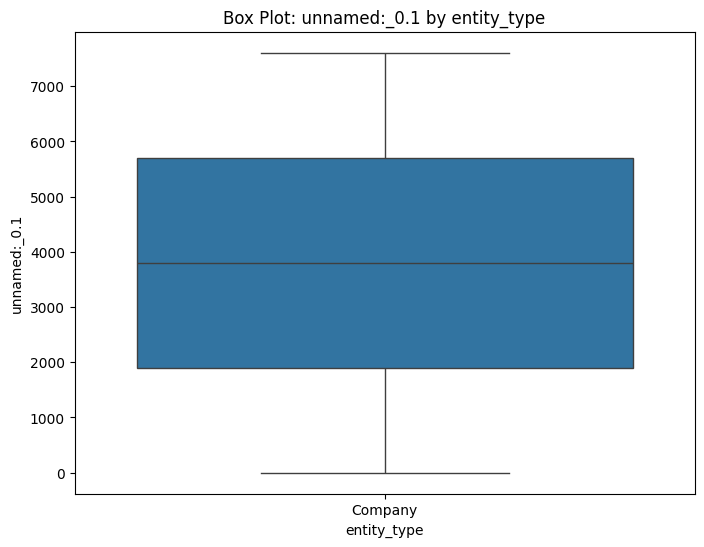

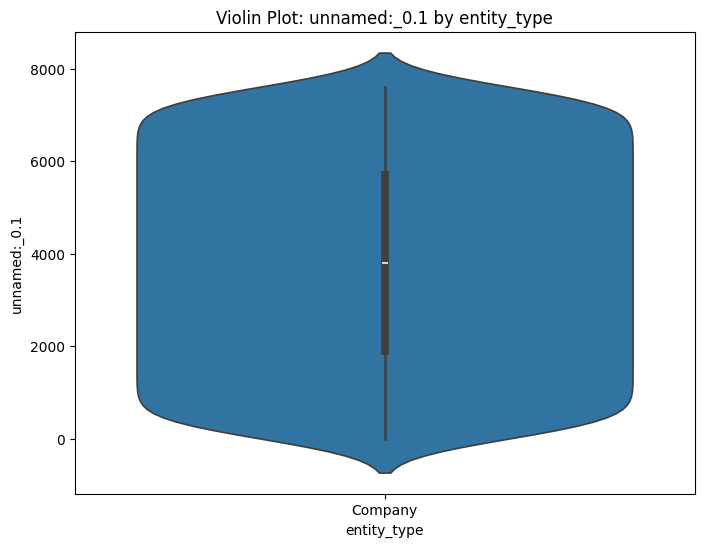

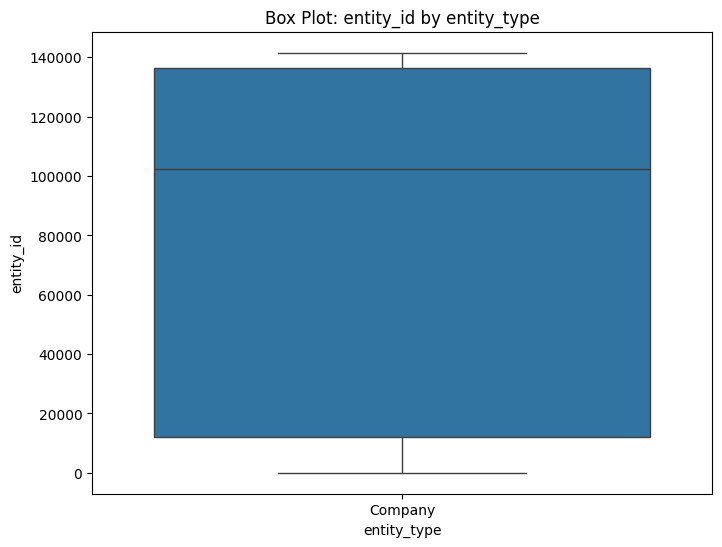

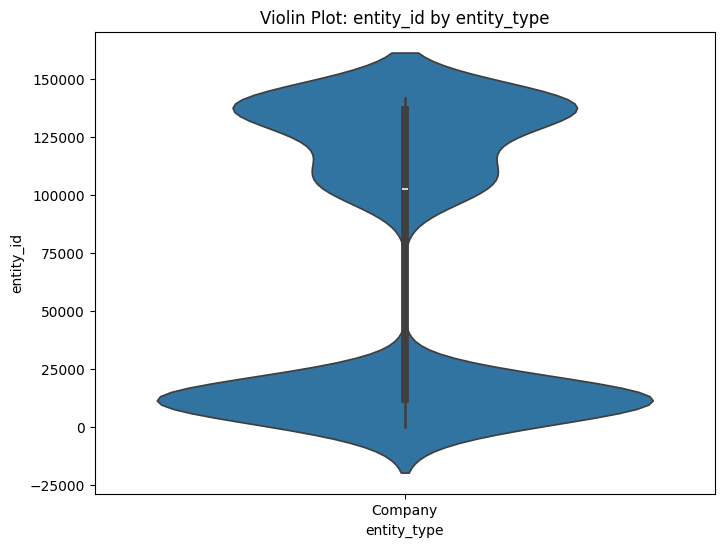

Skipping plot for parent_id vs entity_type — no valid data.


In [16]:
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    if df[col].nunique() <= 10:  # Only low-cardinality categorical columns
        for num_col in numeric_cols[:3]:
            # Ensure numeric and drop NaNs
            temp_df = df[[col, num_col]].copy()
            temp_df[num_col] = pd.to_numeric(temp_df[num_col], errors='coerce')
            temp_df = temp_df.dropna(subset=[num_col, col])

            if temp_df.empty:
                print(f"Skipping plot for {num_col} vs {col} — no valid data.")
                continue

            # Box plot
            plt.figure(figsize=(8, 6))
            sns.boxplot(x=temp_df[col], y=temp_df[num_col])
            plt.title(f"Box Plot: {num_col} by {col}")
            plt.show()

            # Violin plot
            plt.figure(figsize=(8, 6))
            sns.violinplot(x=temp_df[col], y=temp_df[num_col])
            plt.title(f"Violin Plot: {num_col} by {col}")
            plt.show()
        break


# Multivariate Data Analysis


In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from pandas.plotting import parallel_coordinates
from mpl_toolkits.mplot3d import Axes3D


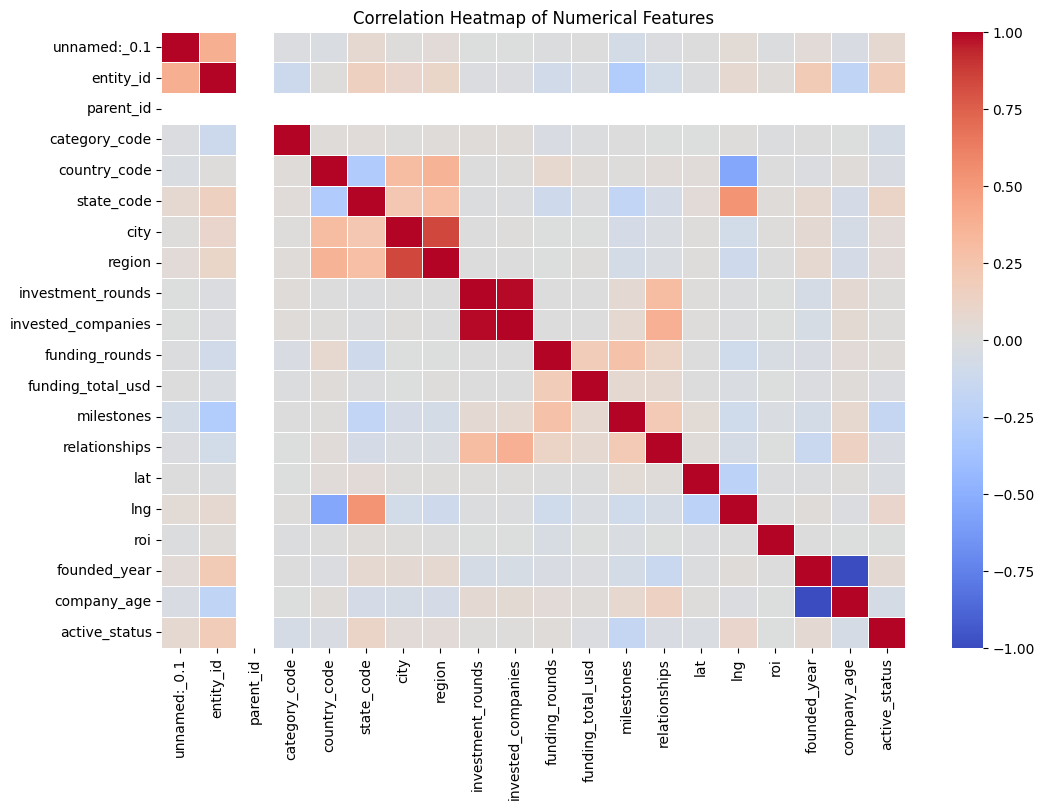

In [18]:
# Correlation Heatmap for Numerical Features
numeric_cols = df.select_dtypes(include=[np.number]).columns
corr_matrix = df[numeric_cols].corr(method='pearson')

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


Explained Variance Ratio by PCA components:
[0.13483316 0.11608195 0.10842064]


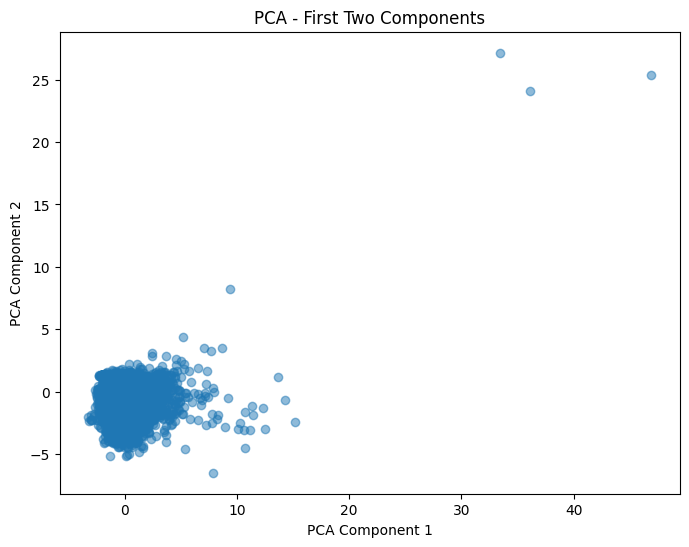

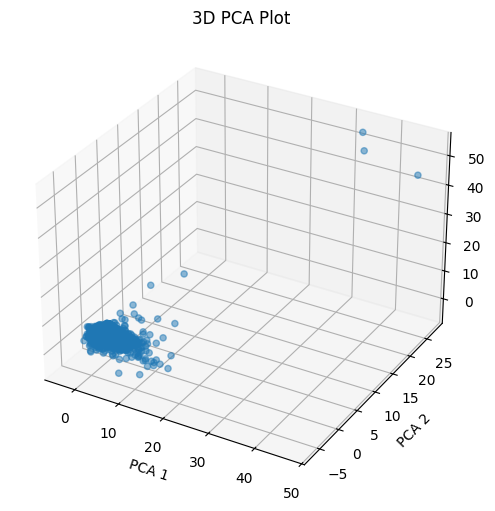

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Convert to numeric and handle errors
numeric_df = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Fill NaN with column mean (and if column is entirely NaN, fill with 0)
numeric_df = numeric_df.fillna(numeric_df.mean())
numeric_df = numeric_df.fillna(0)

# Standardize
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)

# Apply PCA
pca = PCA(n_components=3)
pca_result = pca.fit_transform(scaled_data)

print("\nExplained Variance Ratio by PCA components:")
print(pca.explained_variance_ratio_)

# 2D PCA Plot
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("PCA - First Two Components")
plt.show()

# 3D PCA Plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_result[:, 0], pca_result[:, 1], pca_result[:, 2], alpha=0.5)
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
ax.set_title("3D PCA Plot")
plt.show()


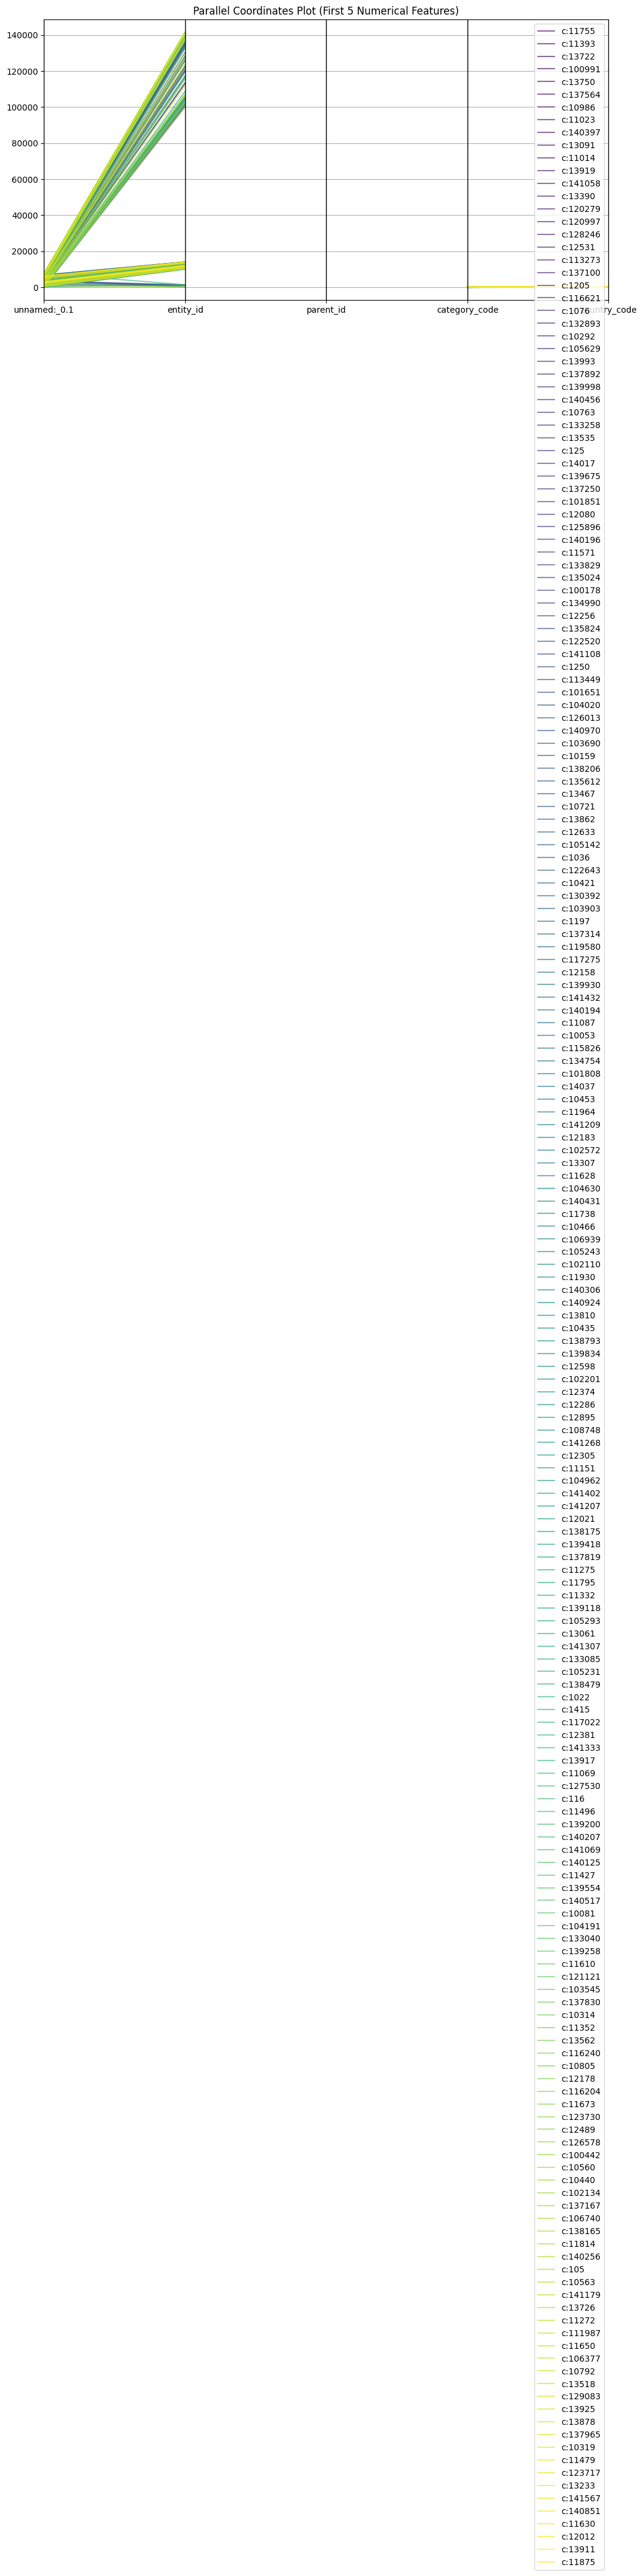

In [21]:
# Parallel Coordinates Plot
# For parallel coordinates, select fewer numeric columns for readability
sample_df = df[numeric_cols[:5]].copy()
sample_df['Category'] = df.select_dtypes(include=['object']).iloc[:, 0]  # First categorical column

# Take a sample to make the plot readable
sample_df = sample_df.sample(200, random_state=42)

plt.figure(figsize=(12, 6))
parallel_coordinates(sample_df, 'Category', colormap=plt.cm.viridis, alpha=0.6)
plt.title("Parallel Coordinates Plot (First 5 Numerical Features)")
plt.show()

# Conclusion and Insights

In [22]:
# Separate numerical and categorical columns
numeric_cols = df.select_dtypes(include=[np.number]).columns
categorical_cols = df.select_dtypes(include=['object']).columns

In [23]:
# Key Dataset Overview
total_rows, total_cols = df.shape
missing_values = df.isnull().sum().sum()
most_missing_col = df.isnull().sum().idxmax()
most_missing_count = df.isnull().sum().max()

In [24]:
# Basic Statistics for Numerical Features
num_summary = df[numeric_cols].describe().T
highest_mean_col = num_summary['mean'].idxmax()
lowest_mean_col = num_summary['mean'].idxmin()

In [25]:
# Categorical Feature Insights
cat_summary = {col: df[col].value_counts().head(1).to_dict() for col in categorical_cols}

In [26]:
# Correlation Insights
corr_matrix = df[numeric_cols].corr()
strong_corr = []
for col in corr_matrix.columns:
    for idx in corr_matrix.index:
        if col != idx and abs(corr_matrix.loc[idx, col]) > 0.7:
            strong_corr.append((idx, col, corr_matrix.loc[idx, col]))

In [27]:
# Print Conclusions
print("=== Conclusion & Insights ===")
print(f"1. The dataset contains {total_rows:,} rows and {total_cols} columns.")
print(f"2. There are {missing_values:,} missing values in total.")
print(f"3. The column with the most missing values is '{most_missing_col}' ({most_missing_count} missing entries).")
print(f"4. The numerical column with the highest mean is '{highest_mean_col}' ({num_summary.loc[highest_mean_col, 'mean']:.2f}).")
print(f"5. The numerical column with the lowest mean is '{lowest_mean_col}' ({num_summary.loc[lowest_mean_col, 'mean']:.2f}).")
print("6. Most frequent categories for each categorical column:")
for col, top_val in cat_summary.items():
    for k, v in top_val.items():
        print(f"   - {col}: '{k}' ({v} occurrences)")
if strong_corr:
    print("7. Strong correlations detected (> 0.7):")
    for item in strong_corr:
        print(f"   - {item[0]} vs {item[1]}: correlation = {item[2]:.2f}")
else:
    print("7. No strong correlations (> 0.7) found.")
print("\nRecommendations:")
print("- Address missing values in key columns before further analysis.")
print("- Strong correlations may indicate redundancy; consider removing one feature or combining them.")
print("- Features with extreme values in mean may require scaling before modeling.")
print("- Categorical columns with dominant categories may cause imbalance; consider grouping rare categories.")


=== Conclusion & Insights ===
1. The dataset contains 7,610 rows and 39 columns.
2. There are 7,610 missing values in total.
3. The column with the most missing values is 'parent_id' (7610 missing entries).
4. The numerical column with the highest mean is 'funding_total_usd' (23208655.90).
5. The numerical column with the lowest mean is 'lng' (-53.67).
6. Most frequent categories for each categorical column:
   - id: 'c:141573' (1 occurrences)
   - entity_type: 'Company' (7610 occurrences)
   - name: '(fluff)Friends' (2 occurrences)
   - normalized_name: 'triggero' (2 occurrences)
   - status: 'operating' (6662 occurrences)
   - founded_at: '2007-01-01' (2956 occurrences)
   - closed_at: '2012-01-01' (7404 occurrences)
   - domain: 'bakespace.com' (1490 occurrences)
   - homepage_url: 'http://www.brandregard.com' (1490 occurrences)
   - twitter_username: 'CrowdSpot_app' (3944 occurrences)
   - short_description: 'Not Provided' (7273 occurrences)
   - description: 'Not Provided' (3844 o

In conclusion, the multivariate data analysis revealed several important patterns and relationships within the dataset. The correlation matrix and heatmap highlighted strong positive and negative relationships between certain numerical features, which could be valuable for predicting target variables or identifying redundant features. The Principal Component Analysis (PCA) indicated that a small number of principal components could explain most of the variance in the data, suggesting the possibility of dimensionality reduction without significant loss of information. Additionally, the 3D plots and parallel coordinates plots provided a clearer view of how multiple features interact simultaneously, revealing clusters, trends, and potential outliers. These findings can guide future decision-making by focusing on the most influential features, simplifying models, and exploring specific feature interactions further to improve predictions and insights.
